# Analysing calibration tests

In [1]:
import sys 
import os

#path_code = os.path.dirname(__file__)

#important to import file that are not here
#sys.path.append(os.path.abspath(path_code))

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog, Tk
from processing.processing_functions import temporal_mean_filter, save_imgs, temporal_median_filter, open_images, binarize_imgs, correct_background, select_ROI, invert_imgs, mask_ROIs
from analysis.Analyse_results_with_connected_components import Measure
from skimage import io
#from analysis.Select_ROI import execute_roi
#from AcquireAndSave import execute_capture
#from AcquireAndDisplay import execute_focus


In [2]:
## OPENING FILES
ORIGINAL_FOLDER = os.path.dirname(os.path.realpath('run_processing_analysis.py'))
print('THIS IS ORIGINAL FOLDER PATH', str(ORIGINAL_FOLDER))
IMG_FOLDER = os.path.join('images') #Folder where the images taken by the camera to be processed will be located
IMG_PROCESSED_FOLDER = os.path.abspath('images_processed')  #Folder where the resulting images will be located


# 1. Select folder with images
root = Tk()
root.withdraw()
IMG_PATH = os.path.abspath(filedialog.askdirectory( title='Select Folder with images to be analyzed', initialdir = IMG_FOLDER))
print('\n Files to be processed in ', IMG_PATH)
NAME_IMG_FOLDER = os.path.basename(IMG_PATH)

# 2. Select image to use for placing the ROIs
root = Tk()
root.withdraw()
ROI_PATH = os.path.abspath(filedialog.askopenfilename(title='Select image to place ROI ', initialdir = IMG_PATH))
print('\n Selected image to place ROI ', ROI_PATH)


# 3. Loading images in directory folder
imgs, time_creation = open_images(IMG_PATH)
print('Shape imgs', np.shape(imgs))
framerate = np.mean(np.diff(time_creation))
os.chdir(ORIGINAL_FOLDER)

#%%



THIS IS ORIGINAL FOLDER PATH /Users/janet/EnginyeriaBiomèdica/MSc LIFE SCIENCES ENGINEERING/SensUs/Code/SensUs_2021_Code

 Files to be processed in  /Volumes/My Passport/Janet/SENSUS/EXPERIMENTS/20210829/20210829_10ng_used_chip

 Selected image to place ROI  /Volumes/My Passport/Janet/SENSUS/EXPERIMENTS/20210829/20210829_10ng_used_chip/10ng_used_chip-08292021192426-299.tiff

 Opening images /Volumes/My Passport/Janet/SENSUS/EXPERIMENTS/20210829/20210829_10ng_used_chip ...
Shape imgs (300, 3648, 5472)


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## MEDIAN FILTER and Processing

In [3]:
## PRE-PROCESSING IMAGES
print('Original images shape: ', np.shape(imgs))

# 1. Temporal average filter: to remove moving objects
imgs_avg = temporal_median_filter(imgs, 4)
print('Averaged images shape: ', np.shape(imgs_avg))
#imgs_median = temporal_median_filter(imgs, 5)
#%%



Original images shape:  (300, 3648, 5472)

 Computing temporal median filter with kernel size  4 ...
Could not compute window with indices 300 to 303
Could not compute window with indices 304 to 307
Could not compute window with indices 308 to 311
Could not compute window with indices 312 to 315
Could not compute window with indices 316 to 319
Could not compute window with indices 320 to 323
Could not compute window with indices 324 to 327
Could not compute window with indices 328 to 331
Could not compute window with indices 332 to 335
Could not compute window with indices 336 to 339
Could not compute window with indices 340 to 343
Could not compute window with indices 344 to 347
Could not compute window with indices 348 to 351
Could not compute window with indices 352 to 355
Could not compute window with indices 356 to 359
Could not compute window with indices 360 to 363
Could not compute window with indices 364 to 367
Could not compute window with indices 368 to 371
Could not compute

/Applications/anaconda3/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2618: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


Correcting background illumination intensity...
Corrected images shape:  (3648, 5472)
Inverting images...
Binarizing images...
Thresholded images shape:  (75, 3648, 5472)


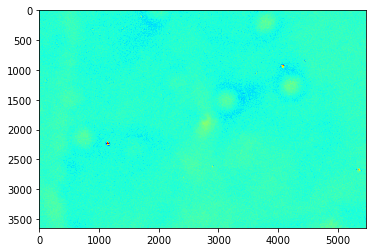

In [4]:
plt.imshow(imgs_avg[10], cmap='jet')
# 2. Background illumination intensity correction
#dark_bright_path = 'Users\Administrator\Desktop\SENSUS\CODE\SensUs_2021_Code-main'
imgs_corrected = correct_background(imgs_avg, ORIGINAL_FOLDER)  #TODO: WARNING IMGS_AVG
print('Corrected images shape: ', np.shape(imgs_corrected[0]))
#%%
plt.imshow(imgs_corrected[10], cmap='jet')
# 3. Inverting image (our AU-NP spots will be white ~255)
imgs_inv = invert_imgs(imgs_corrected)
#print('Inverted images shape: ', np.shape(imgs_inv))
#%%
plt.imshow(imgs_inv[10], cmap='jet')
# 4. Binarizing images: we will have a binary image based on a threshold
rets, imgs_thresh = binarize_imgs(imgs_inv, tr = 130)   #TODO: FIND THRESHOLD
print('Thresholded images shape: ', np.shape(imgs_thresh))

In [ ]:
for i in range(len(imgs_avg)):
    plt.imshow(imgs_thresh[i])
    plt.show()

## Testing Threshold

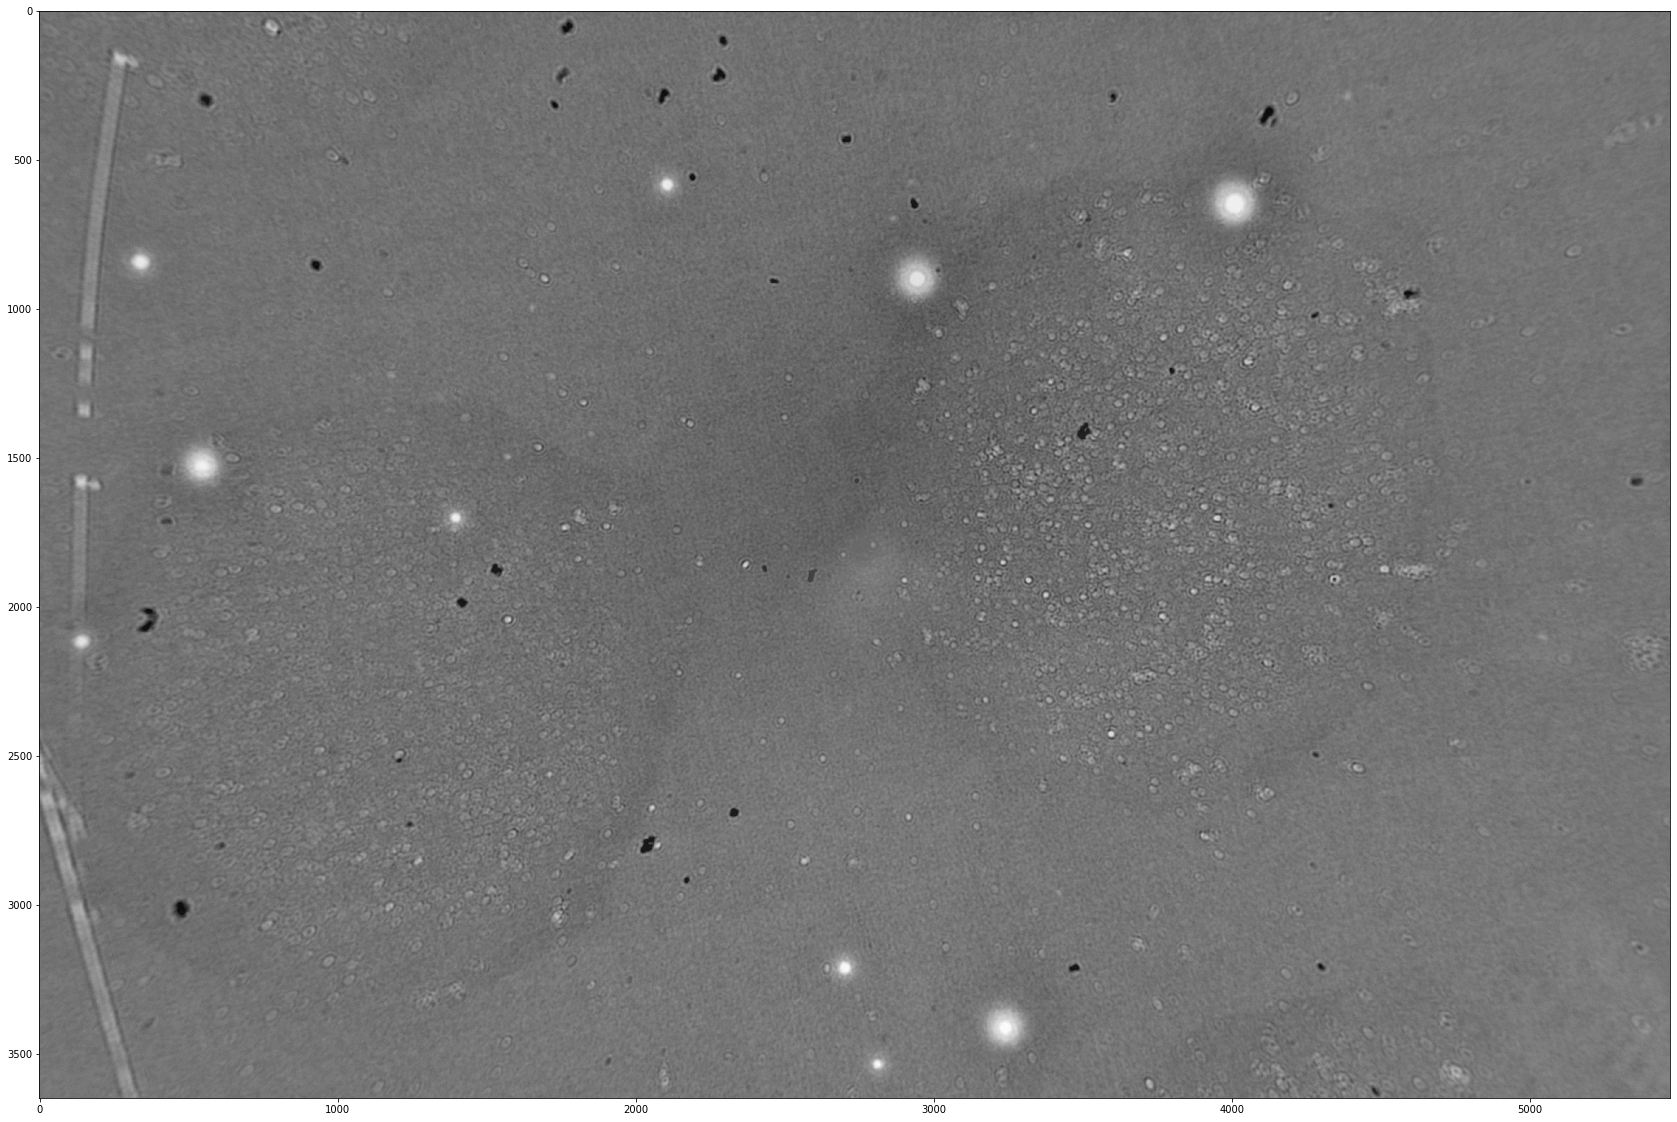

Binarizing images...


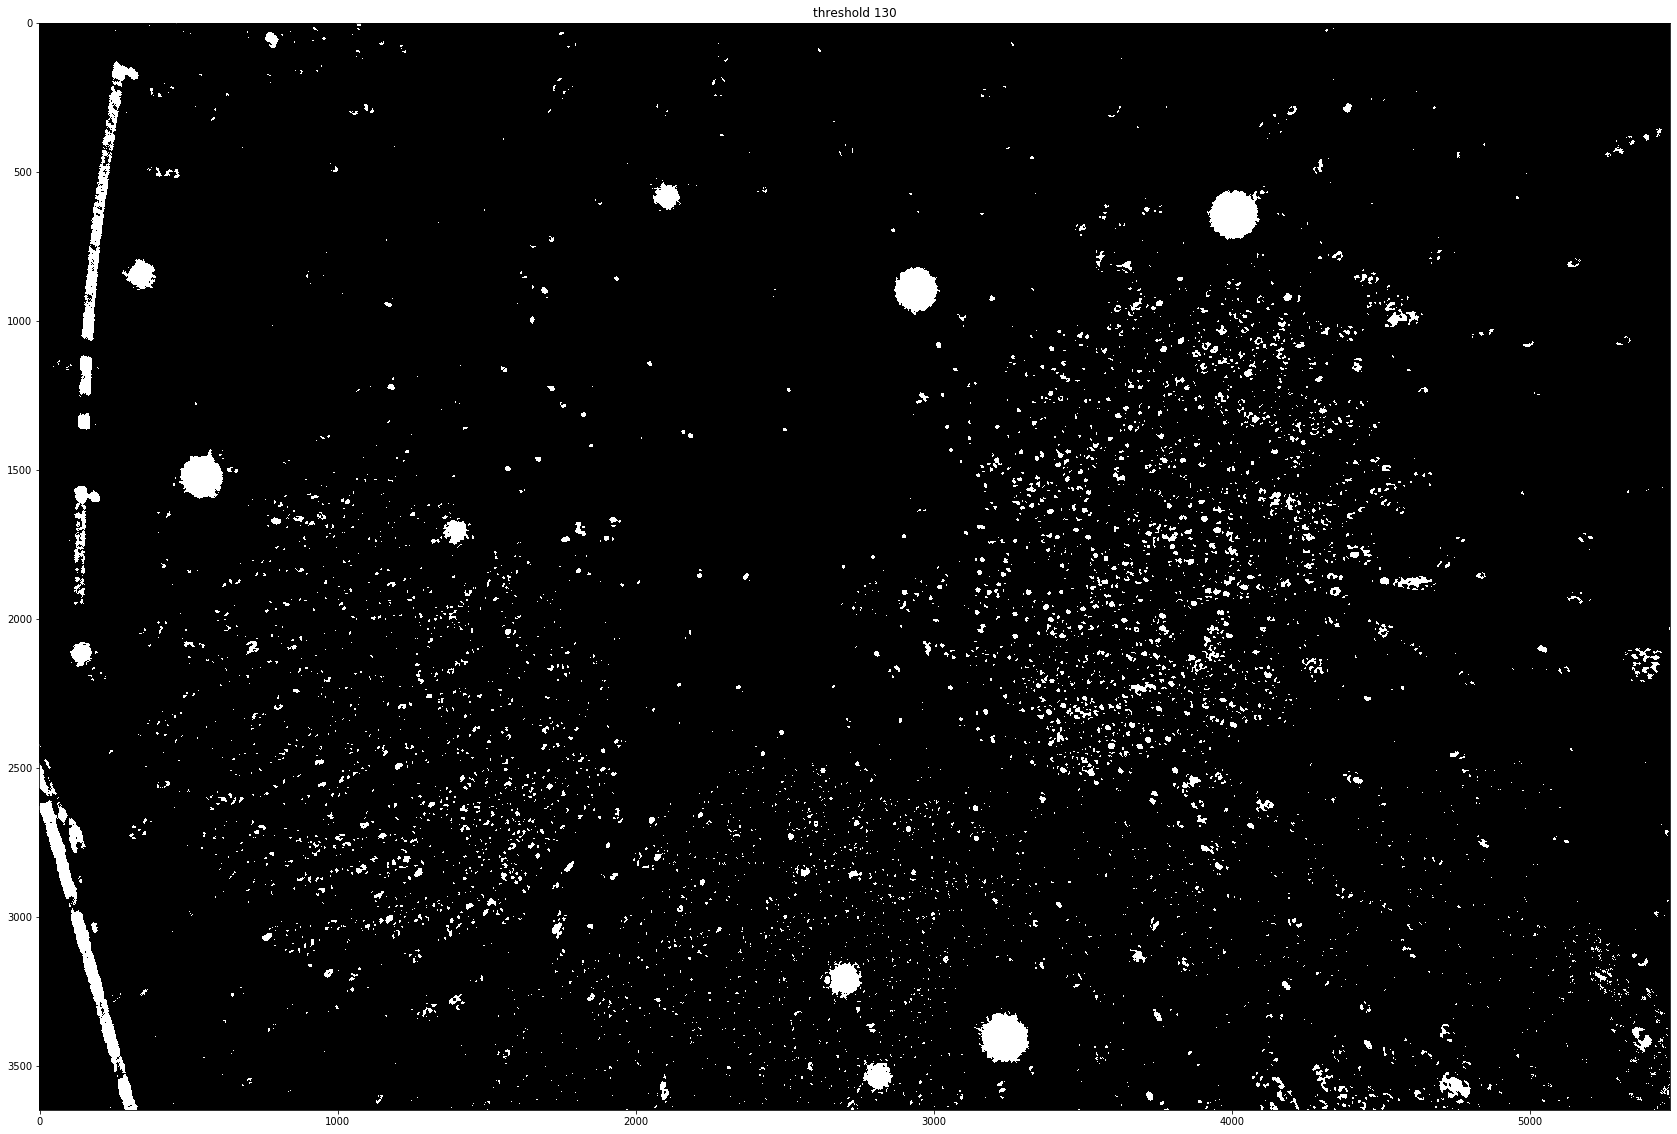

Binarizing images...


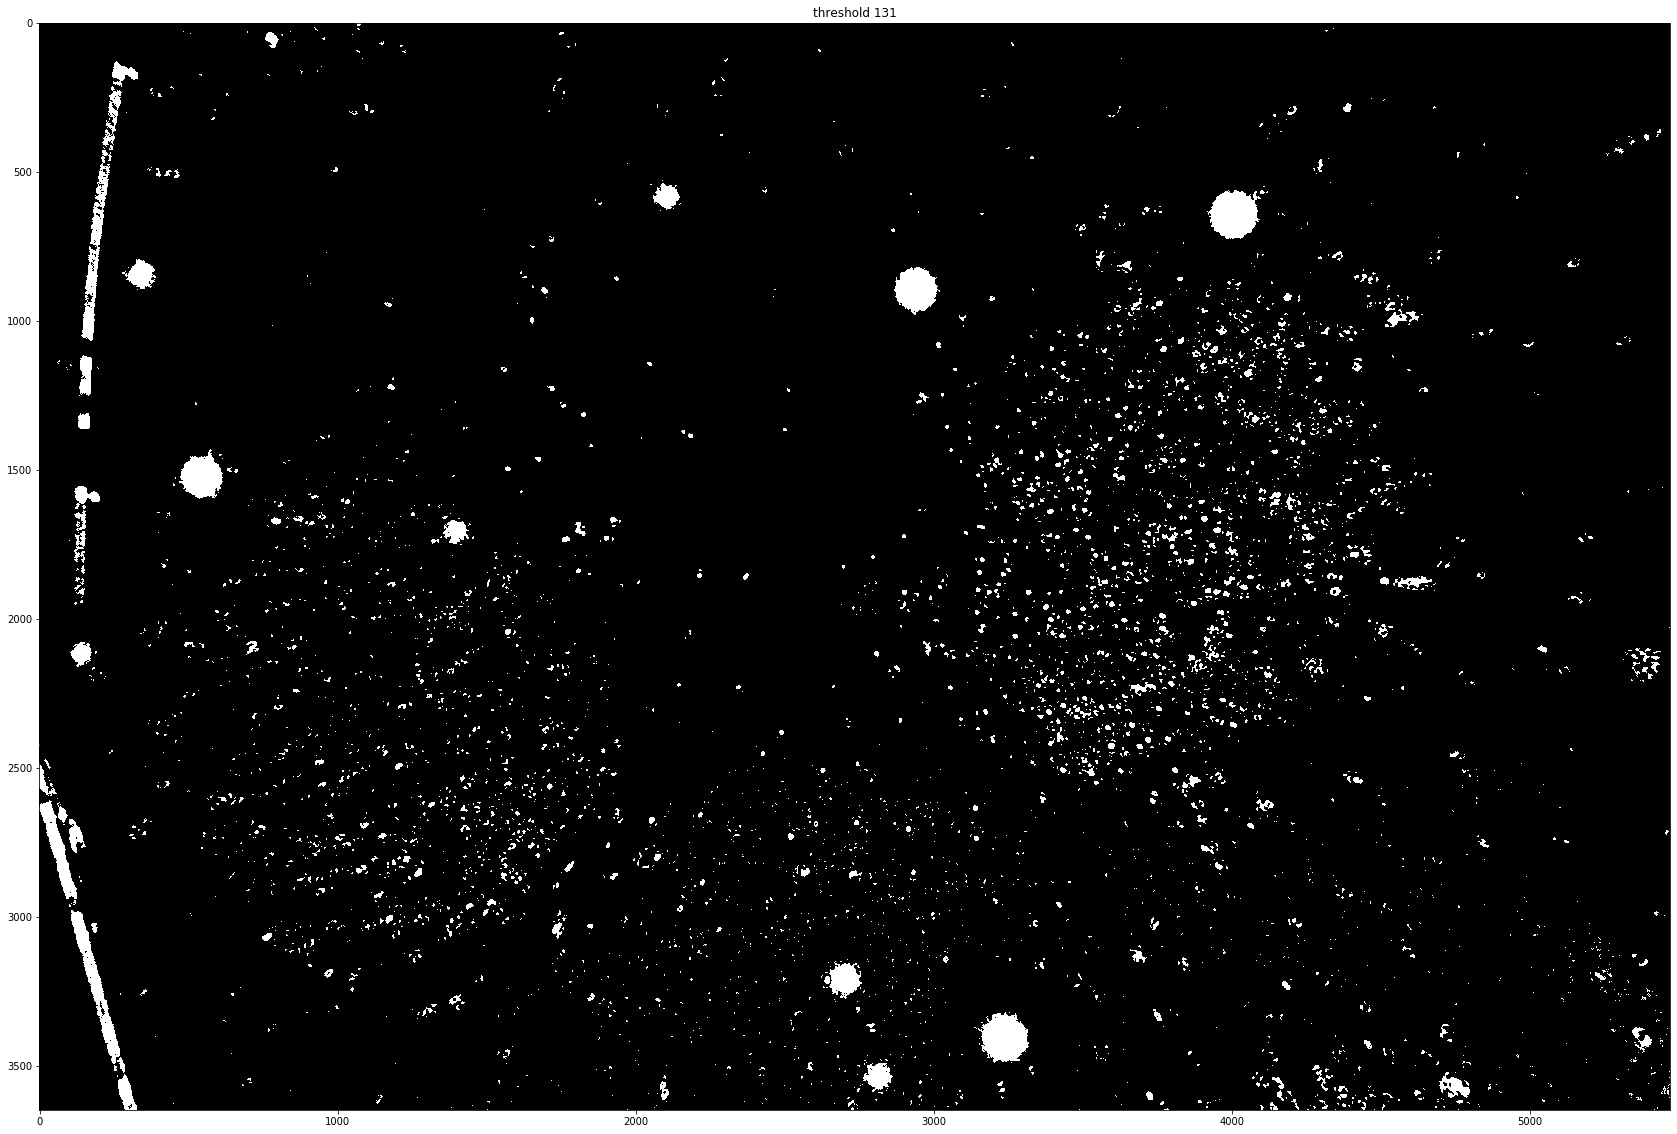

Binarizing images...


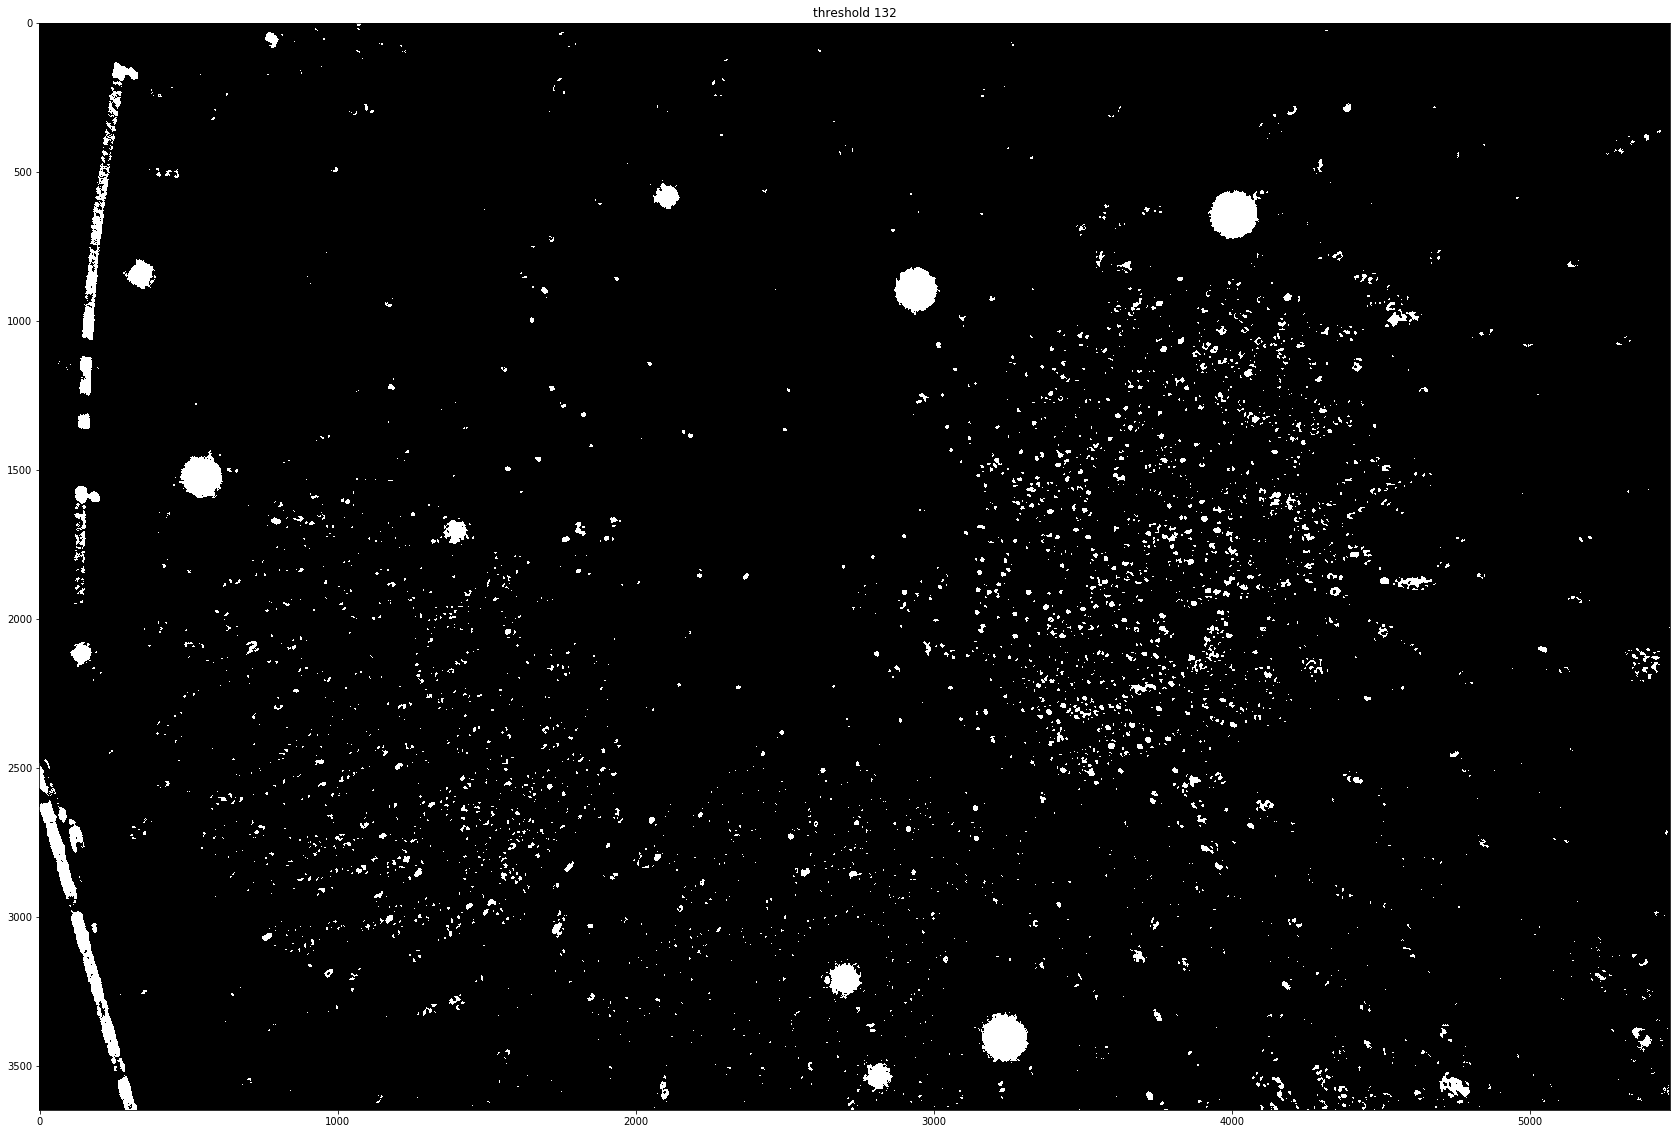

Binarizing images...


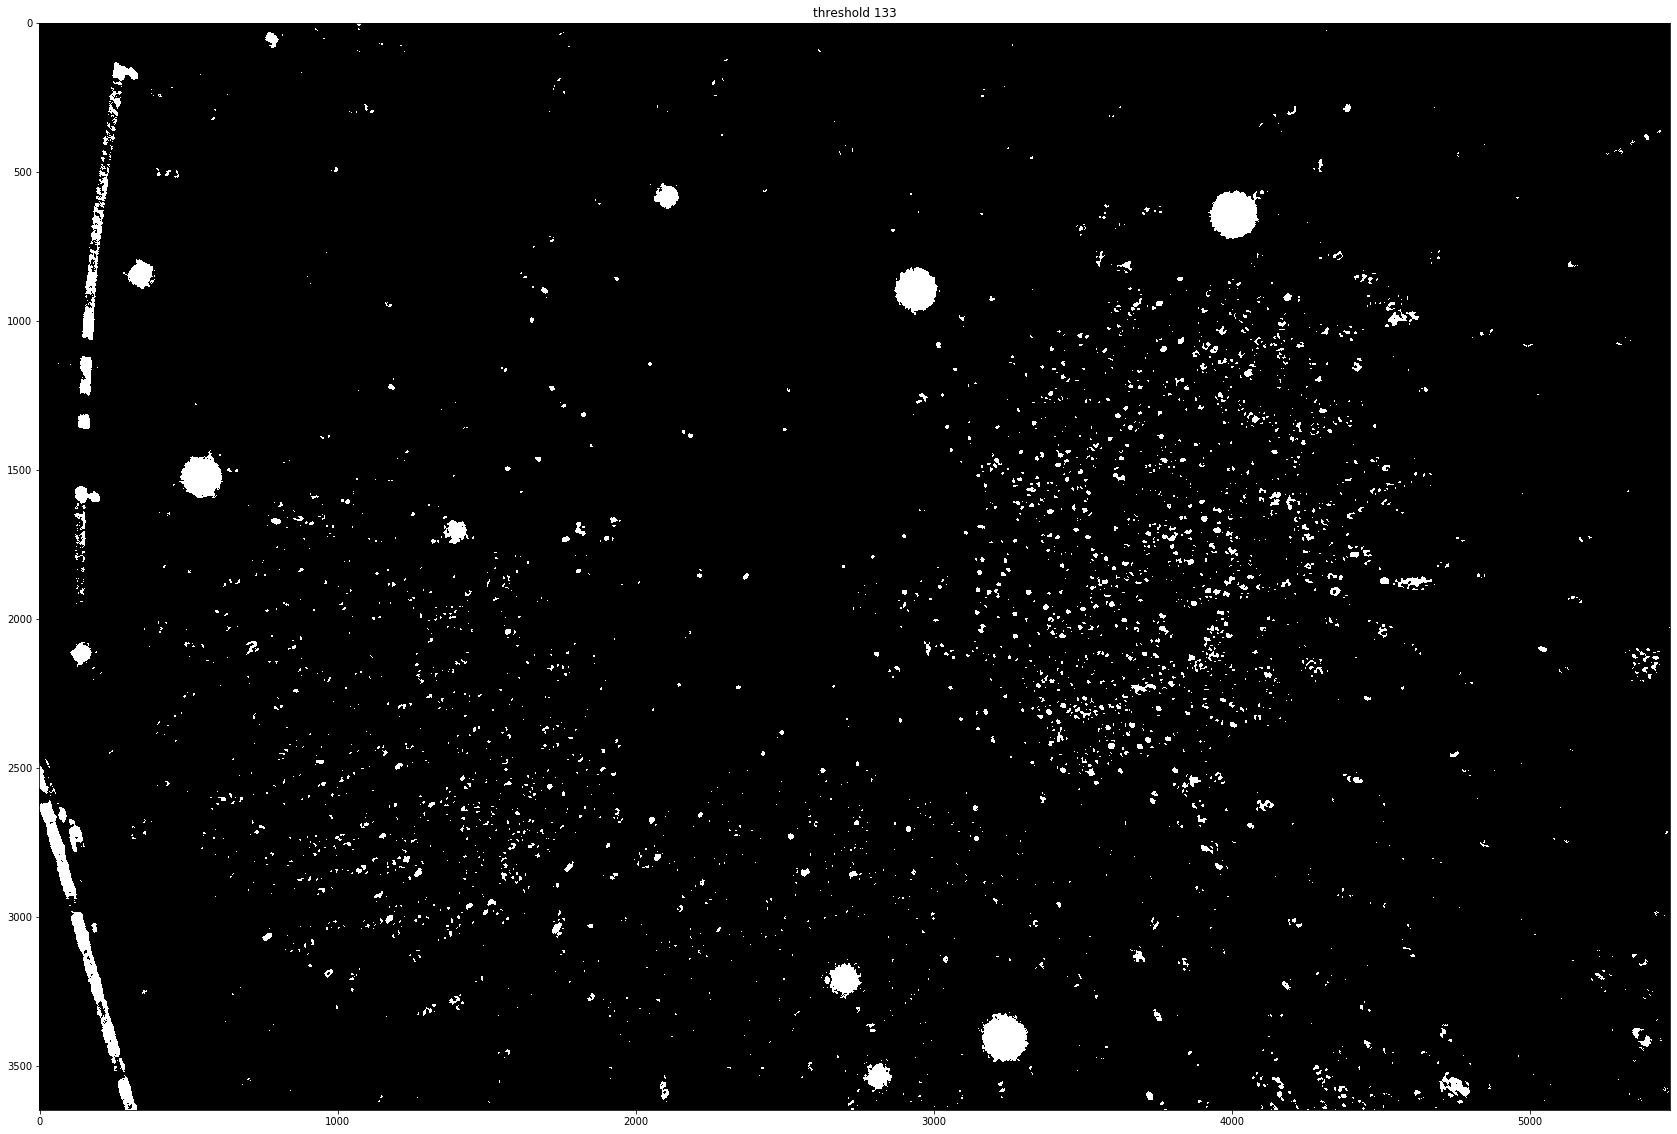

Binarizing images...


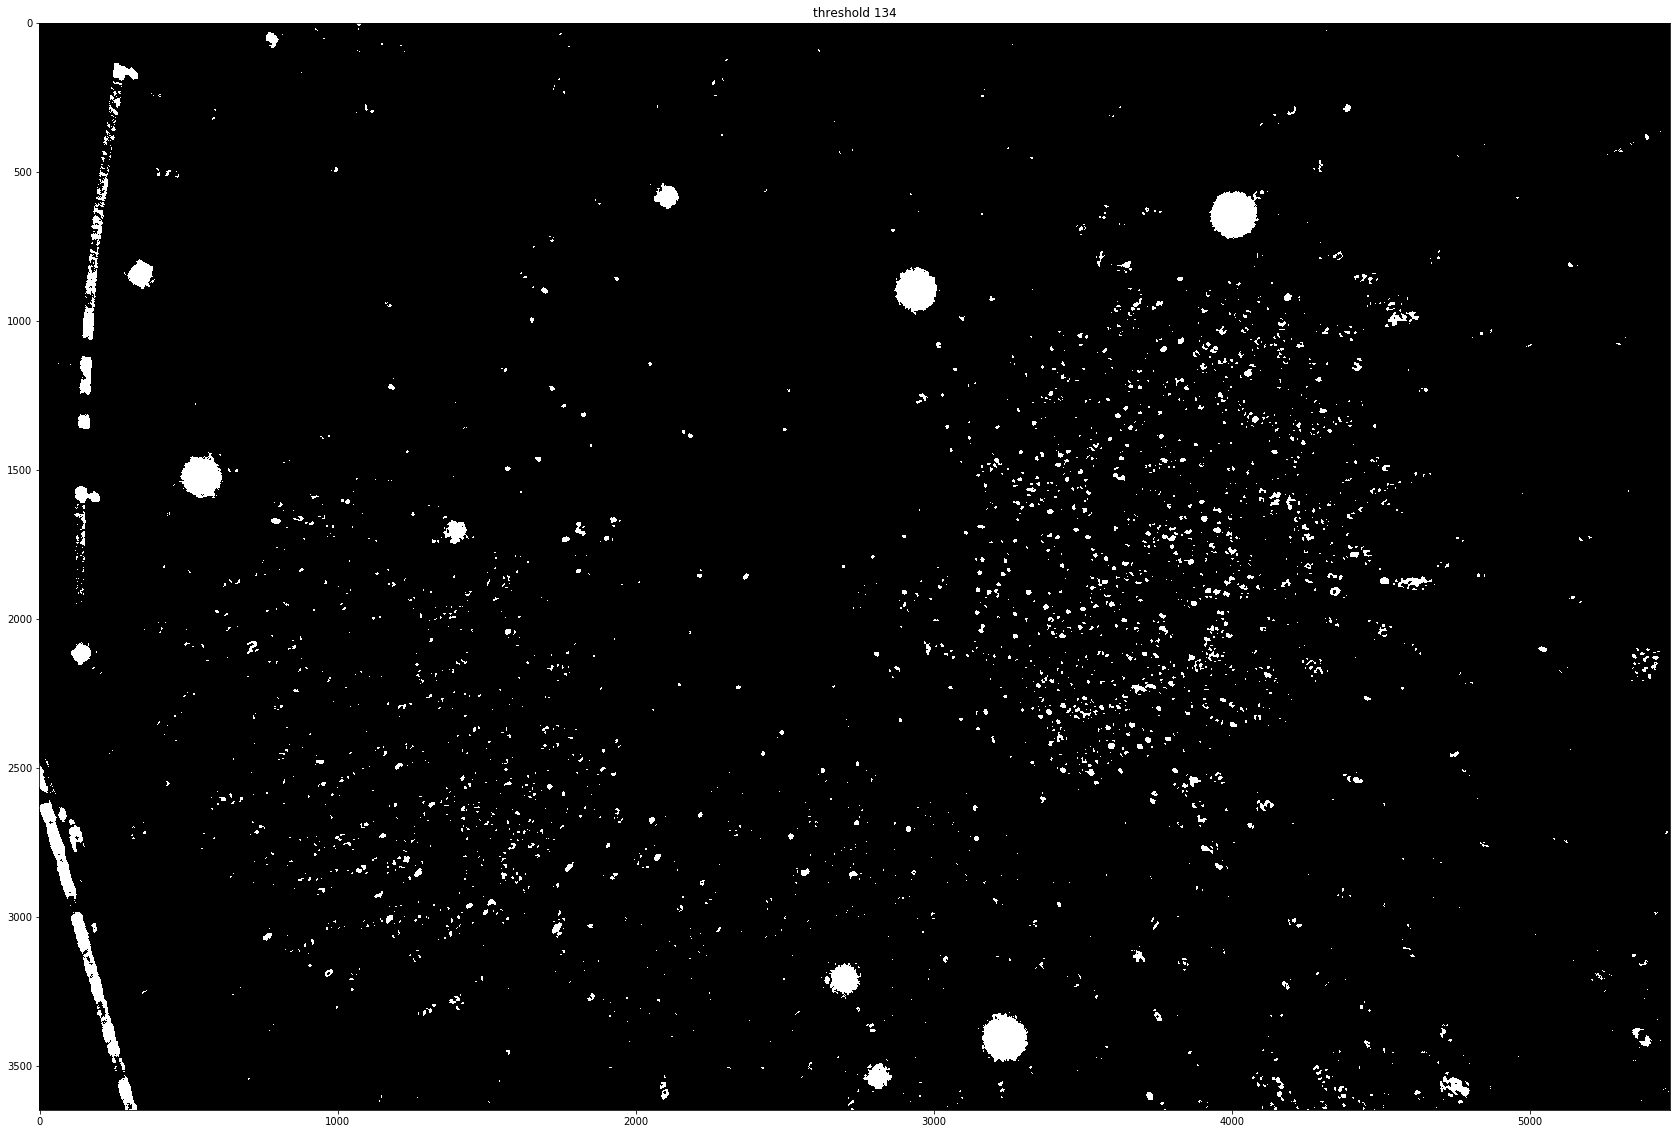

Binarizing images...


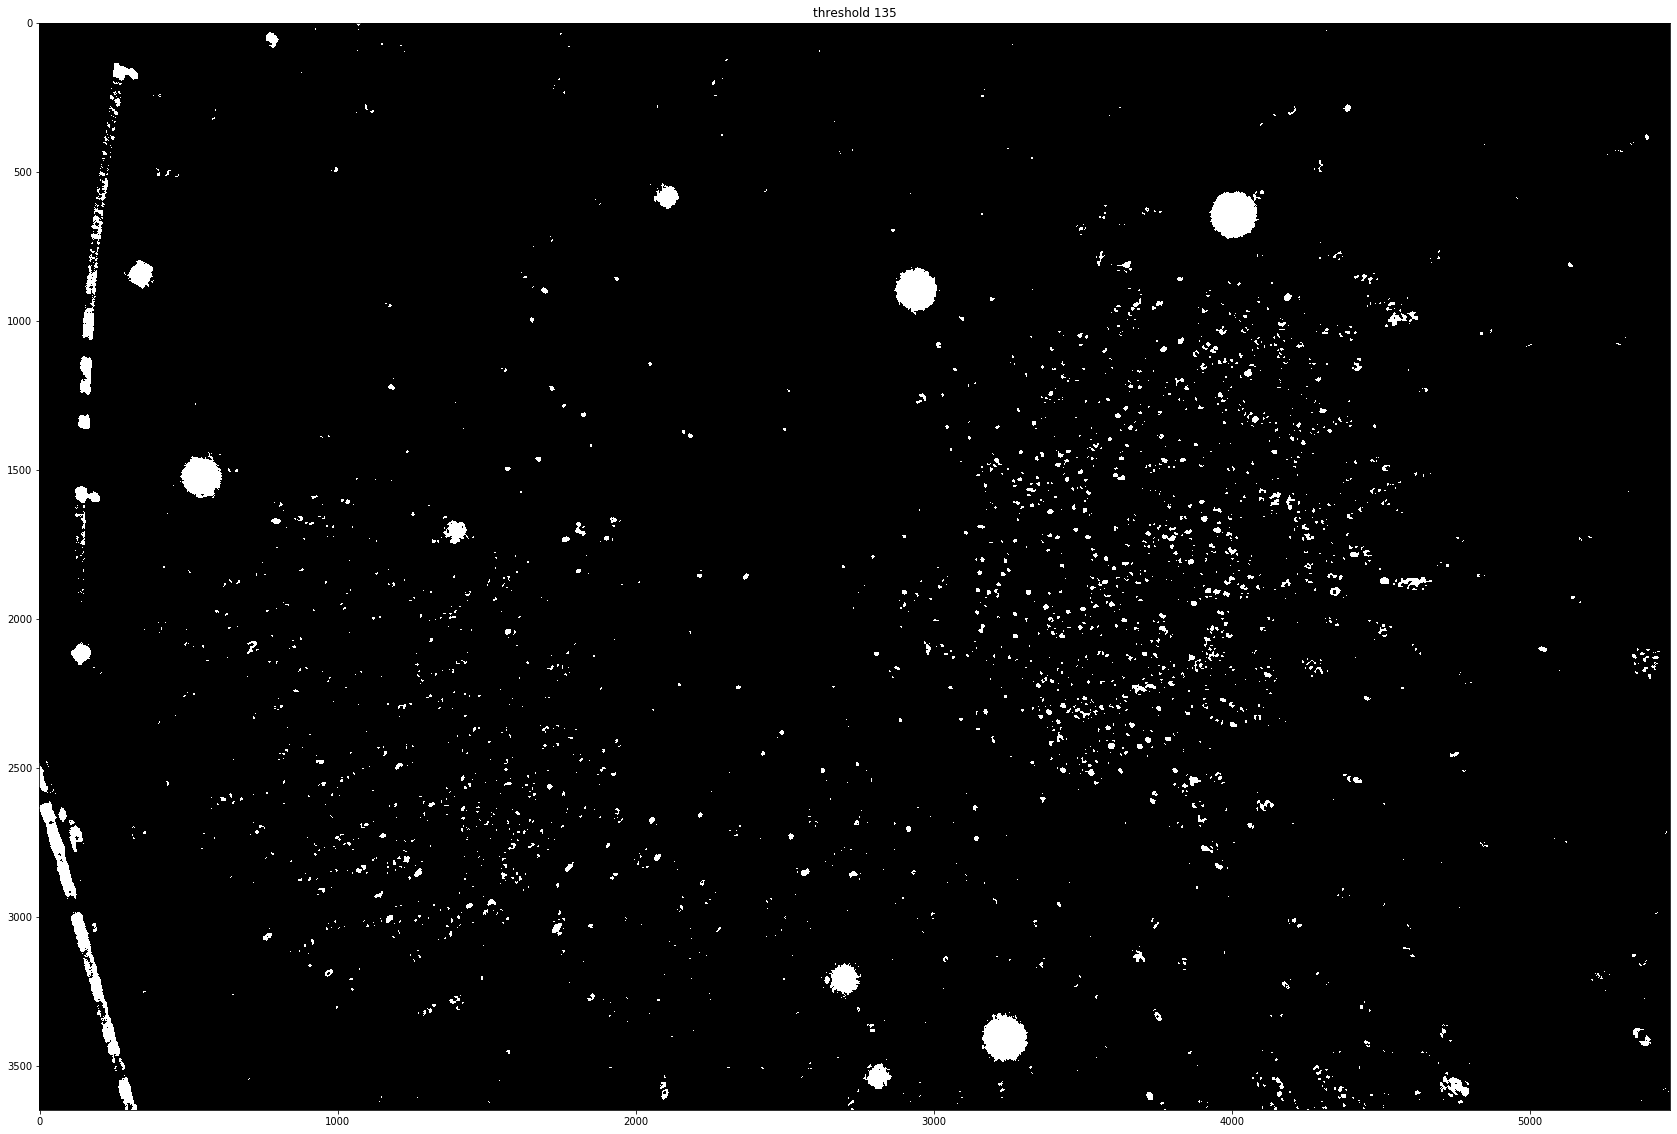

Binarizing images...


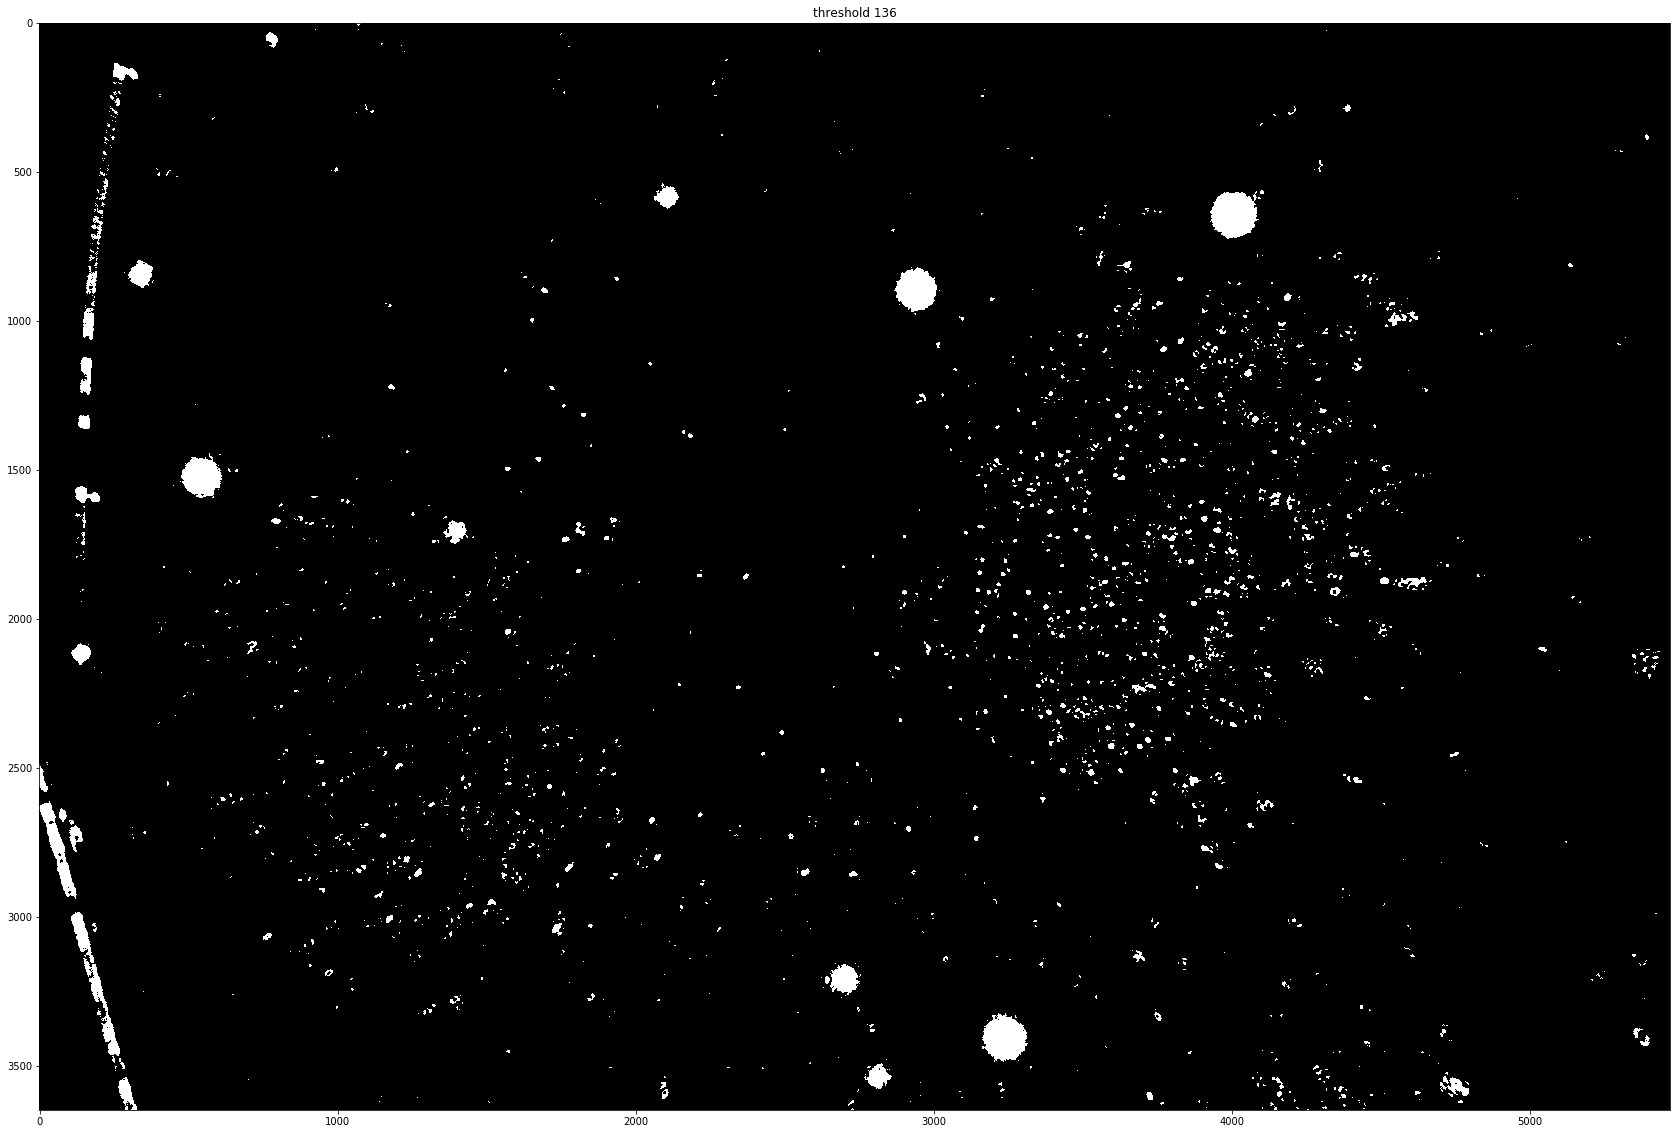

Binarizing images...


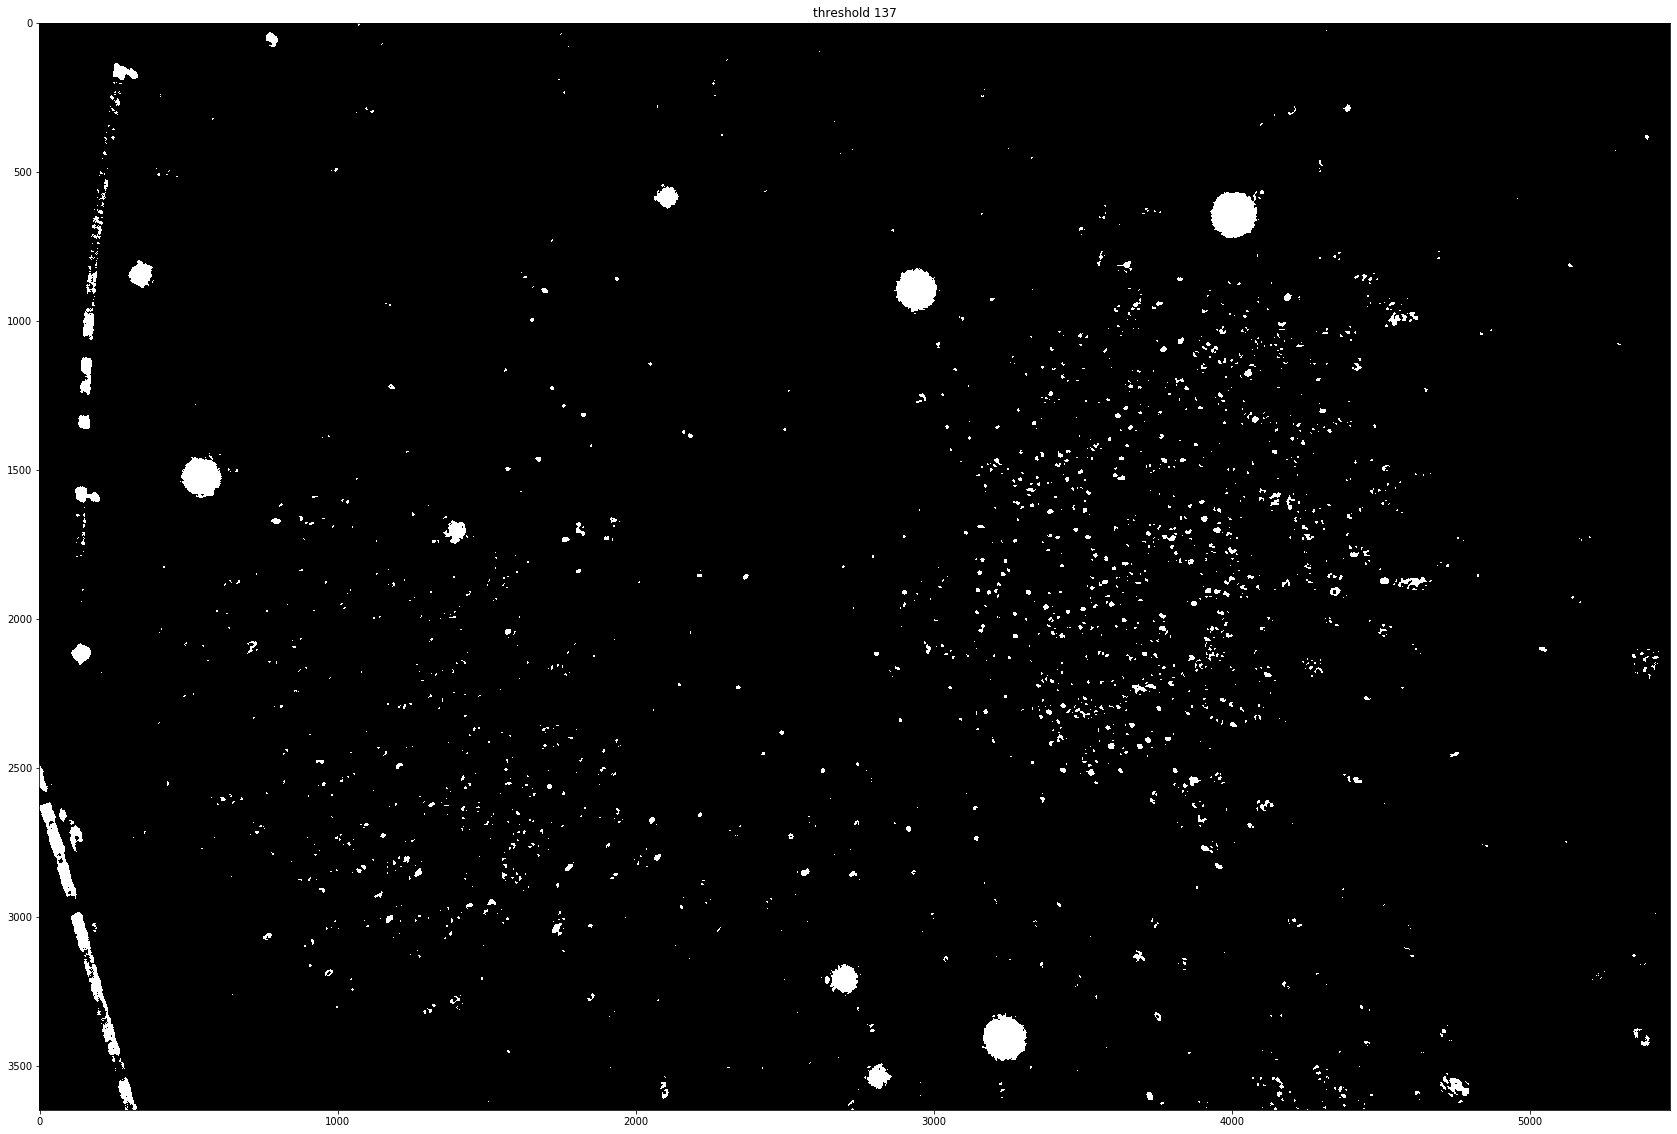

Binarizing images...


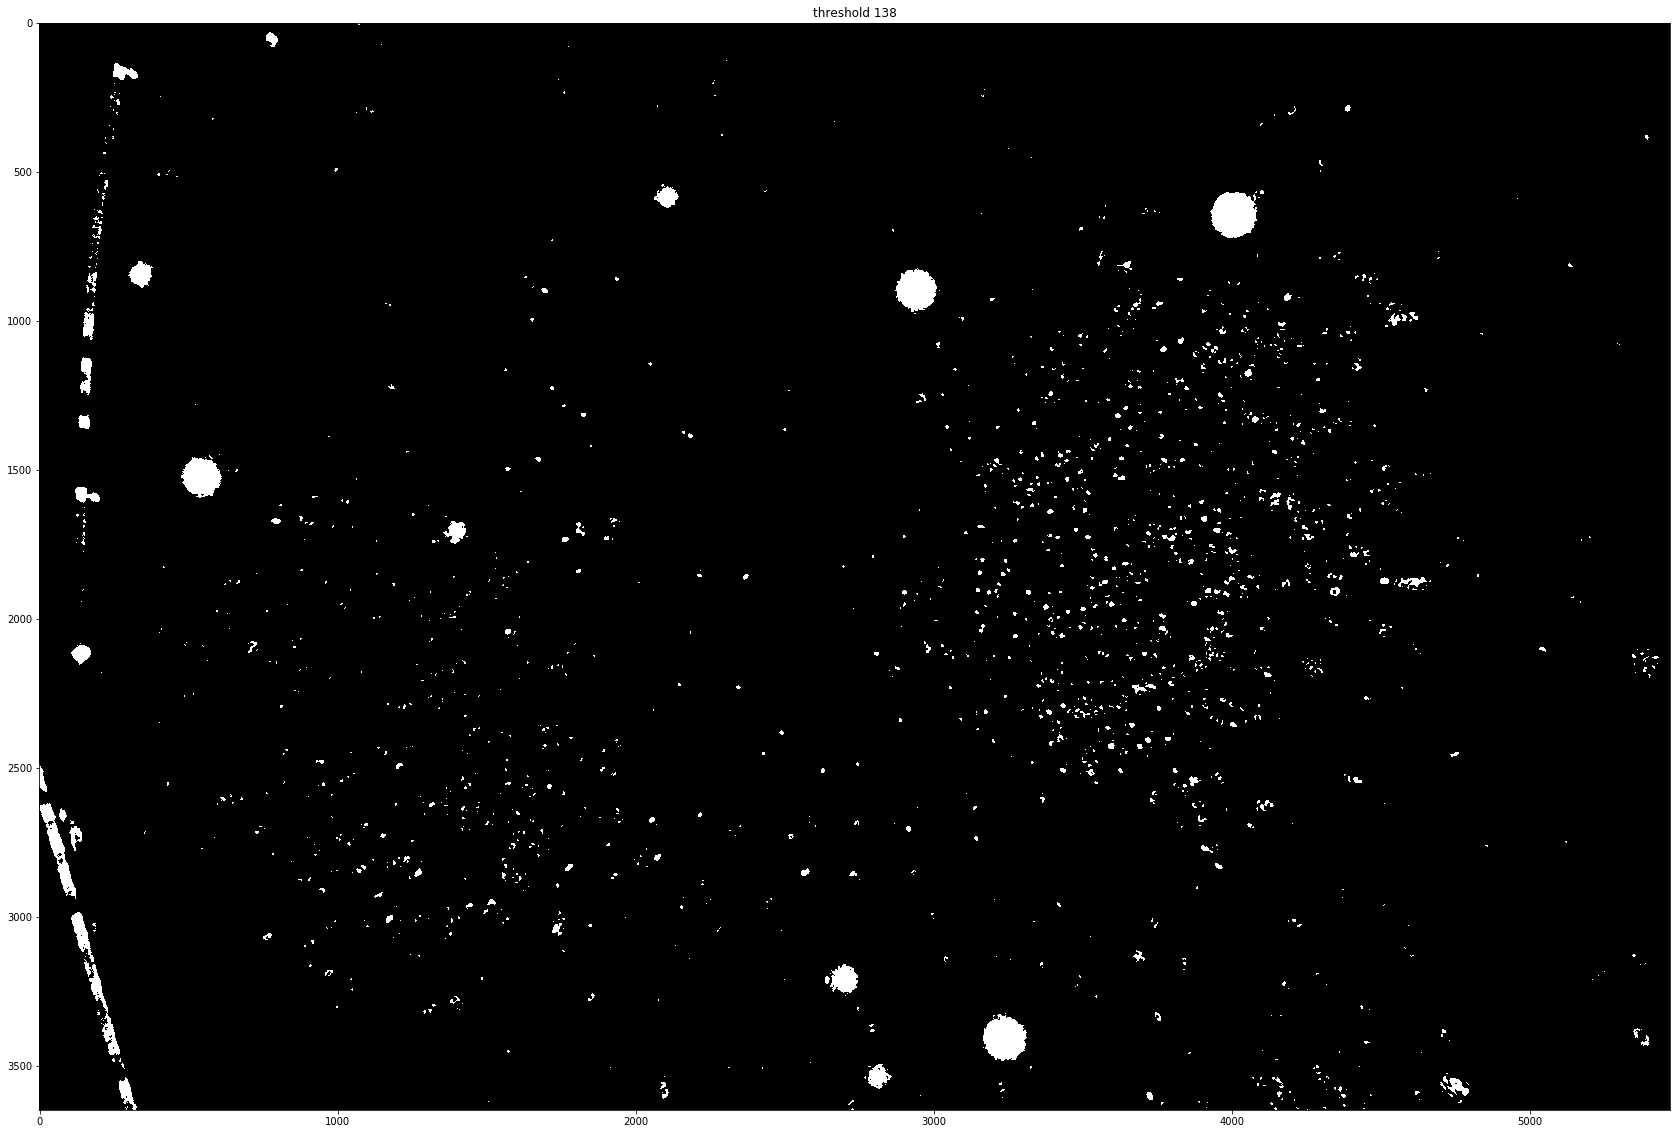

Binarizing images...


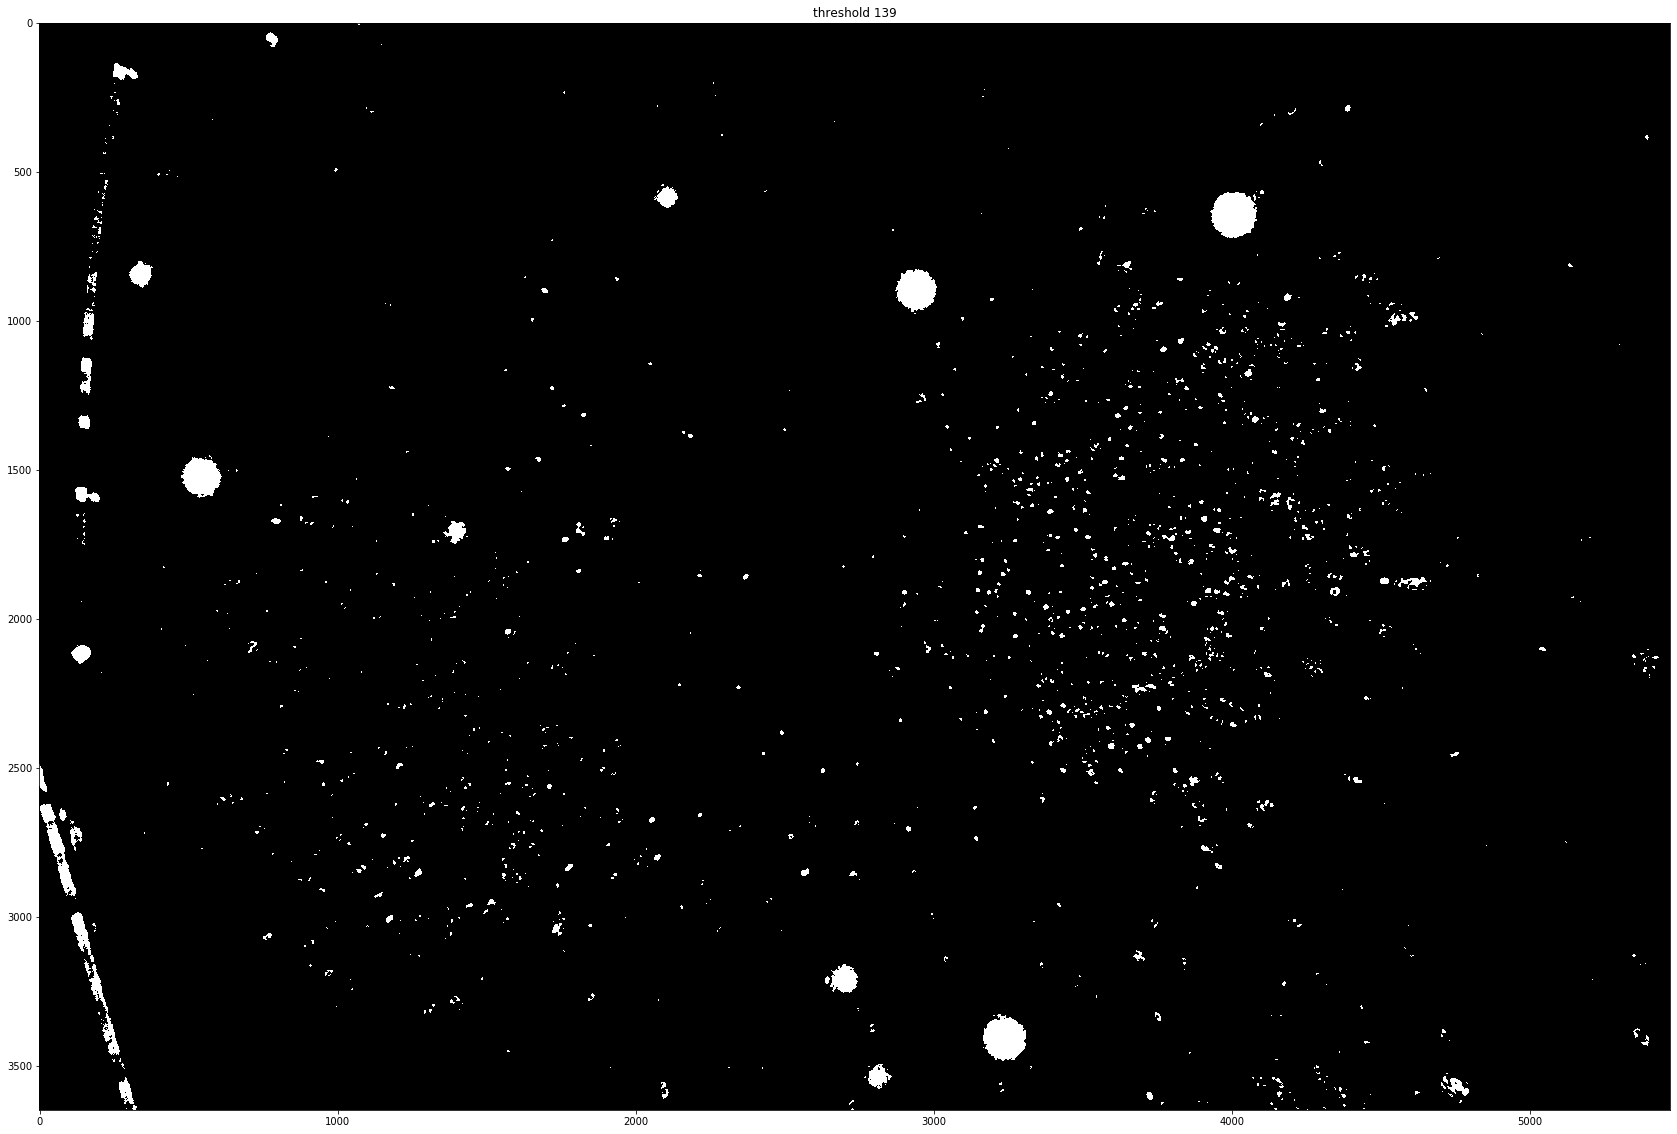

Binarizing images...


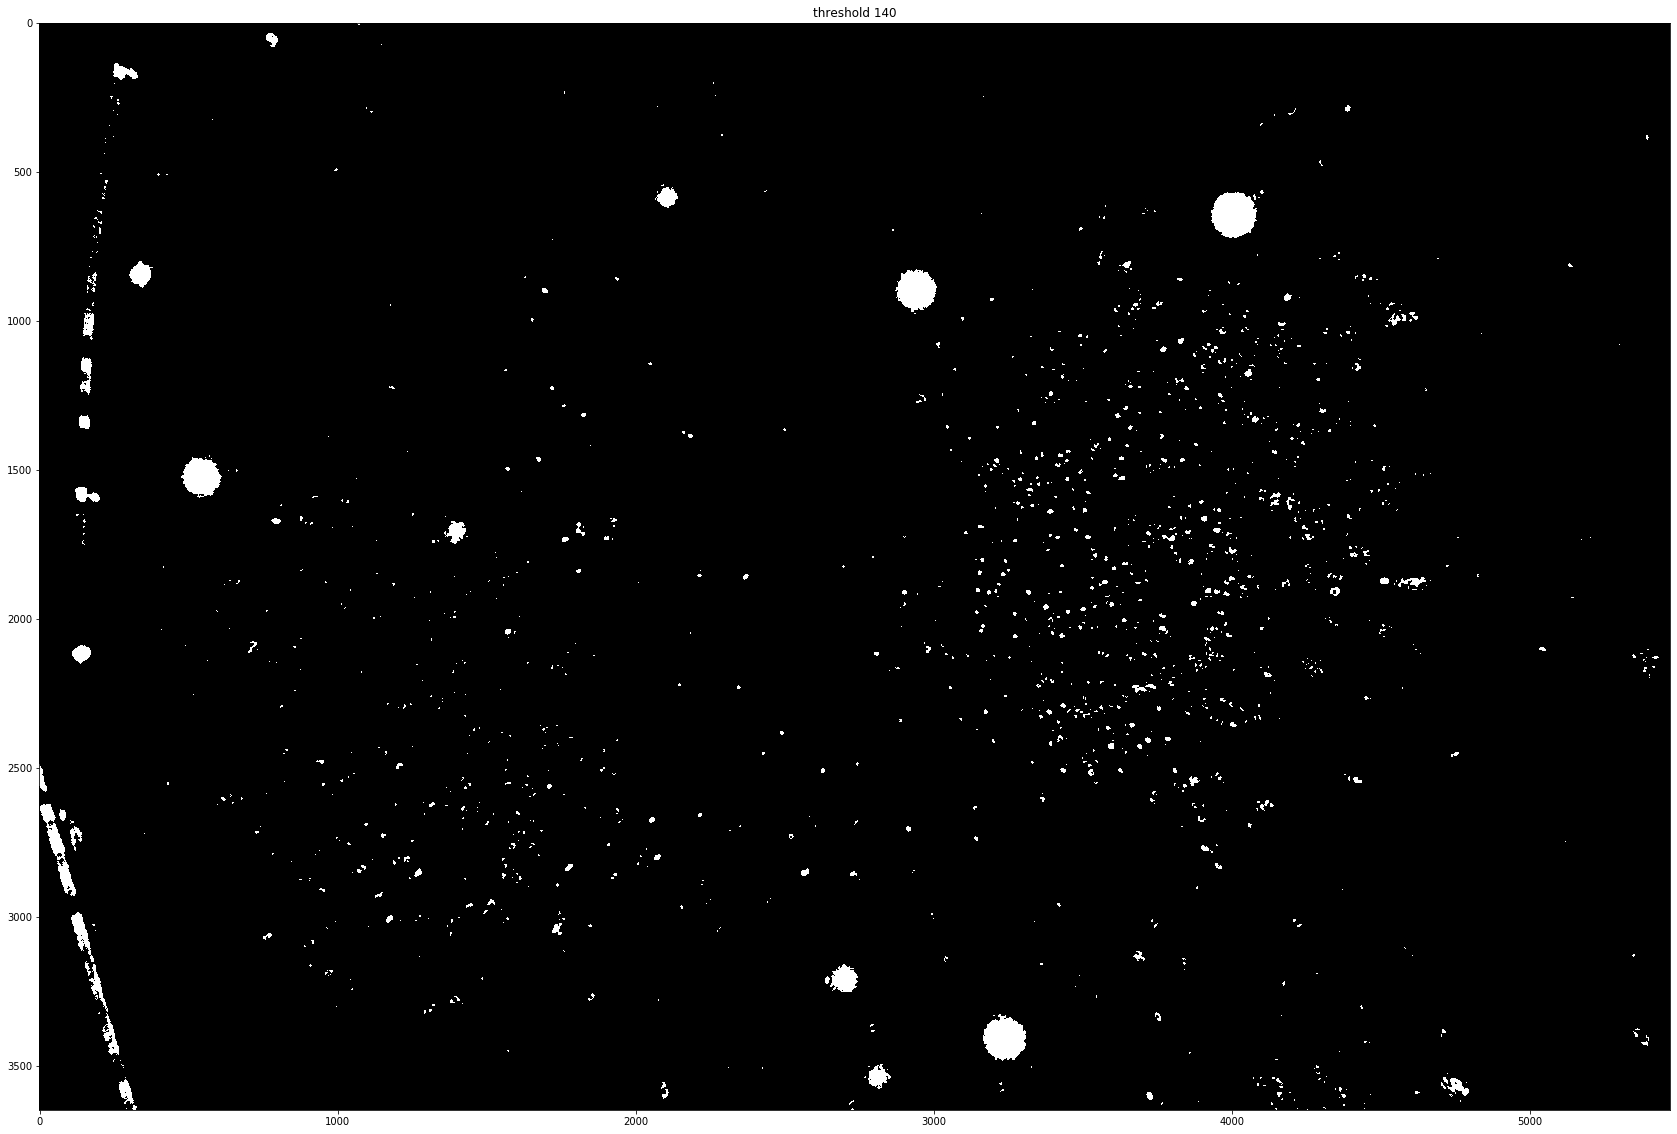

Binarizing images...


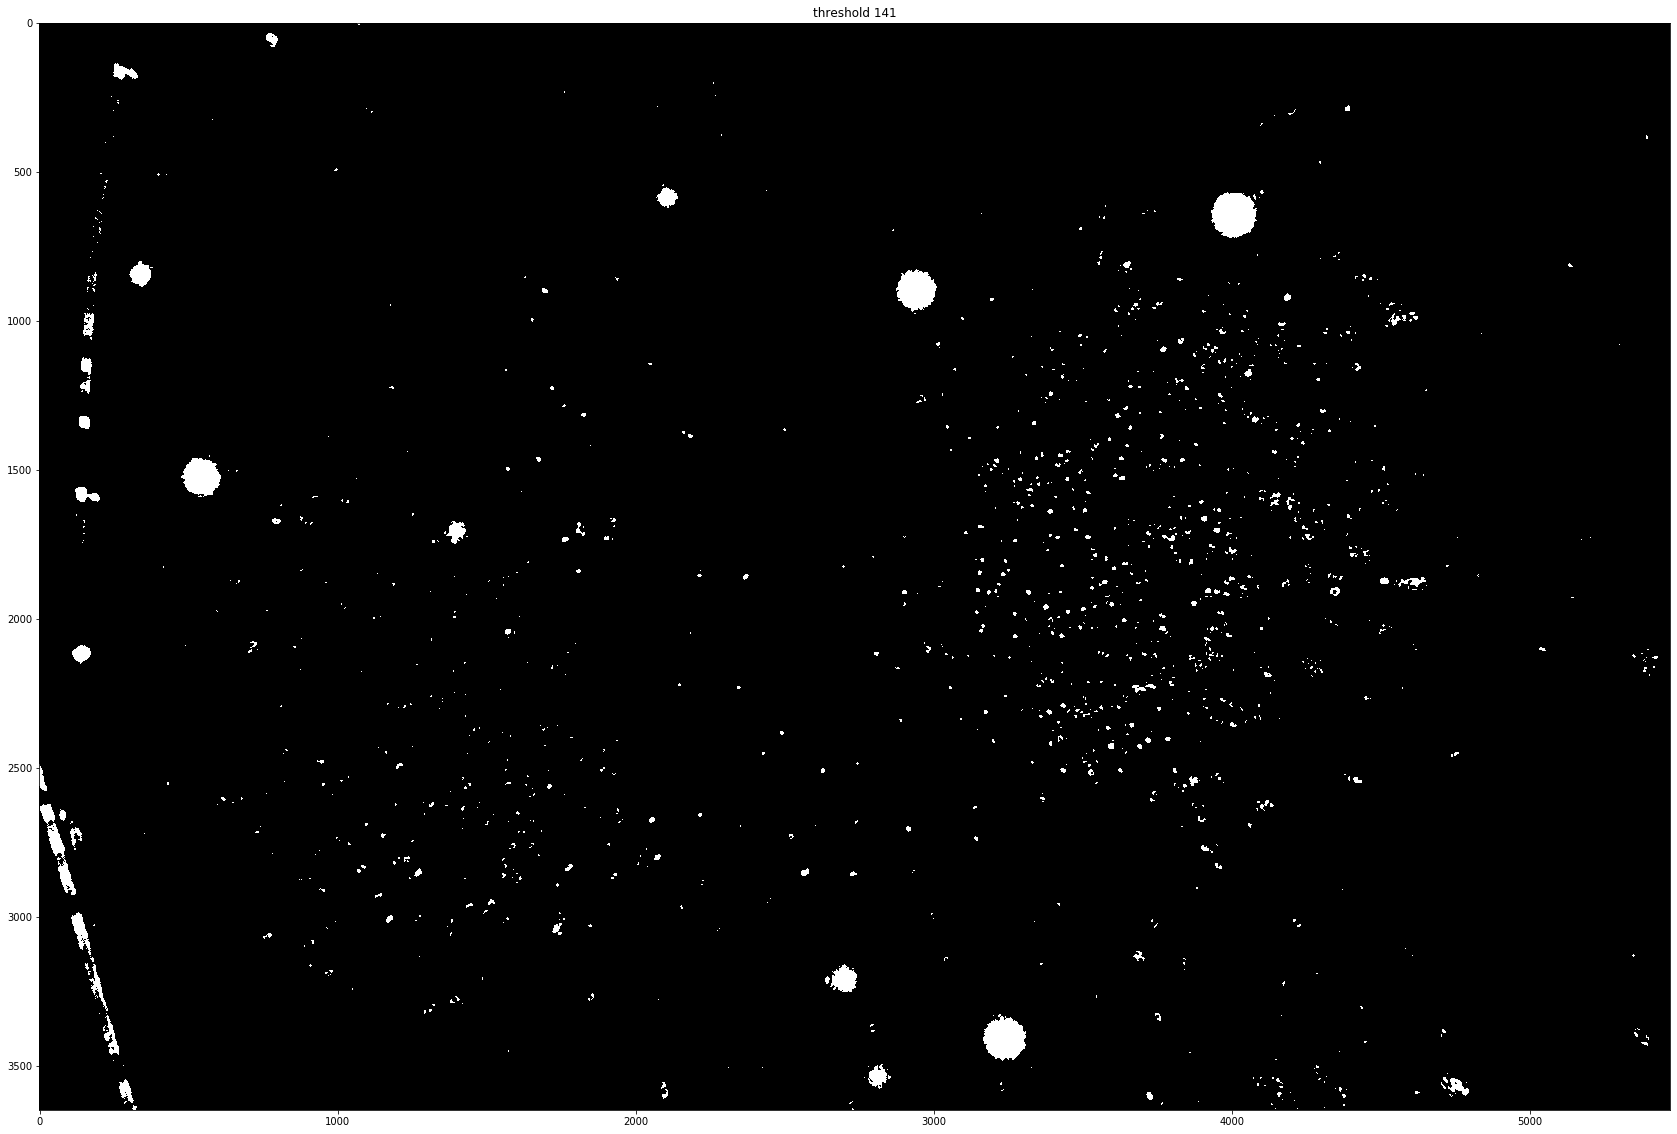

Binarizing images...


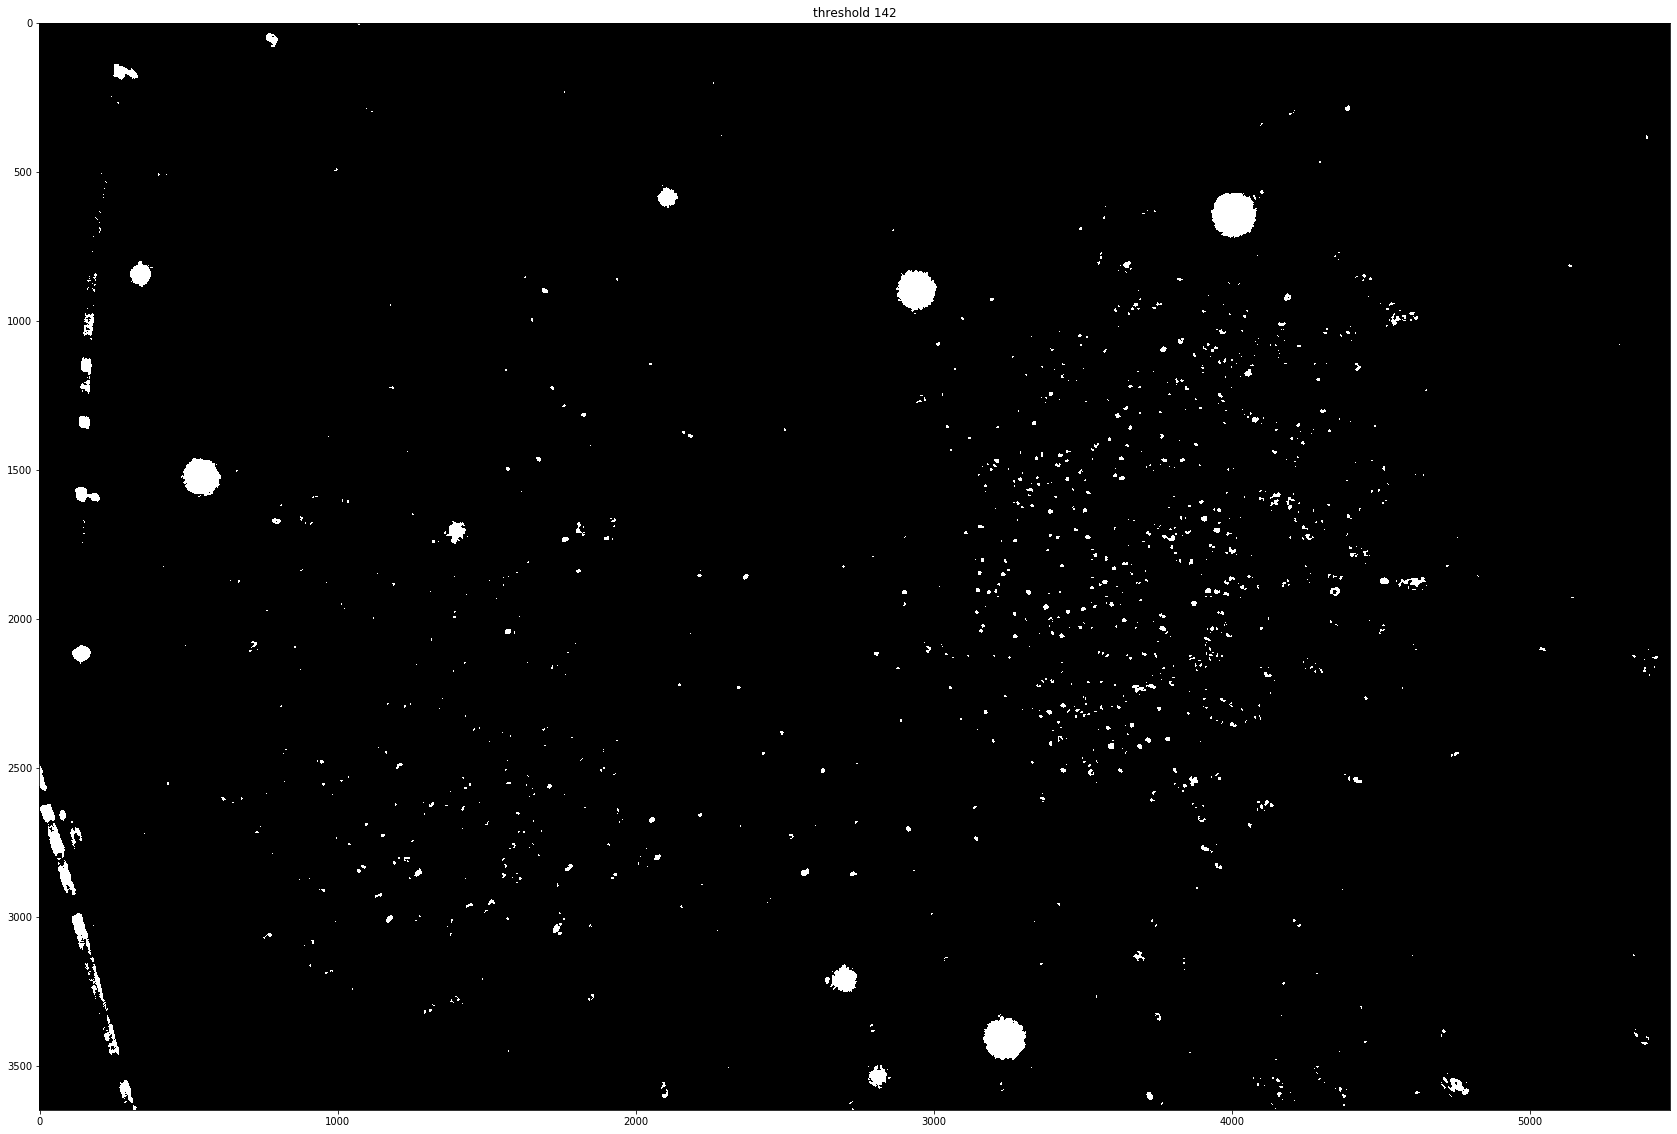

Binarizing images...


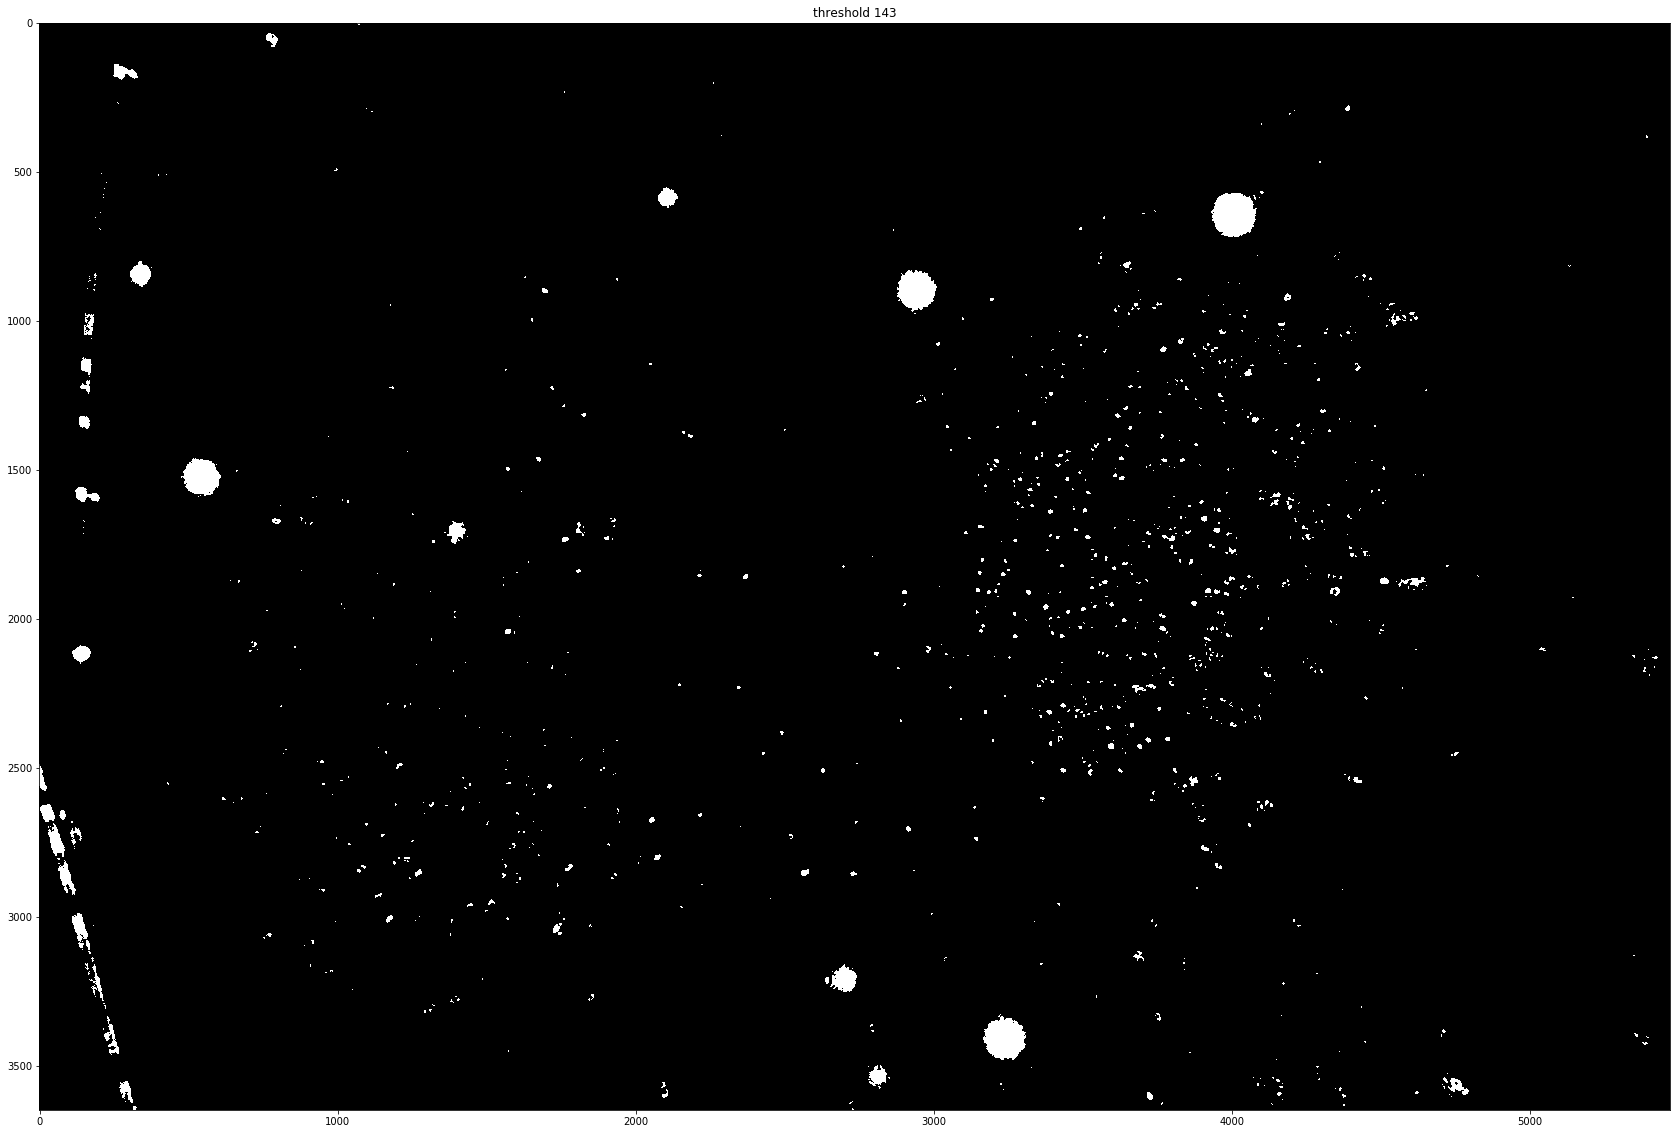

Binarizing images...


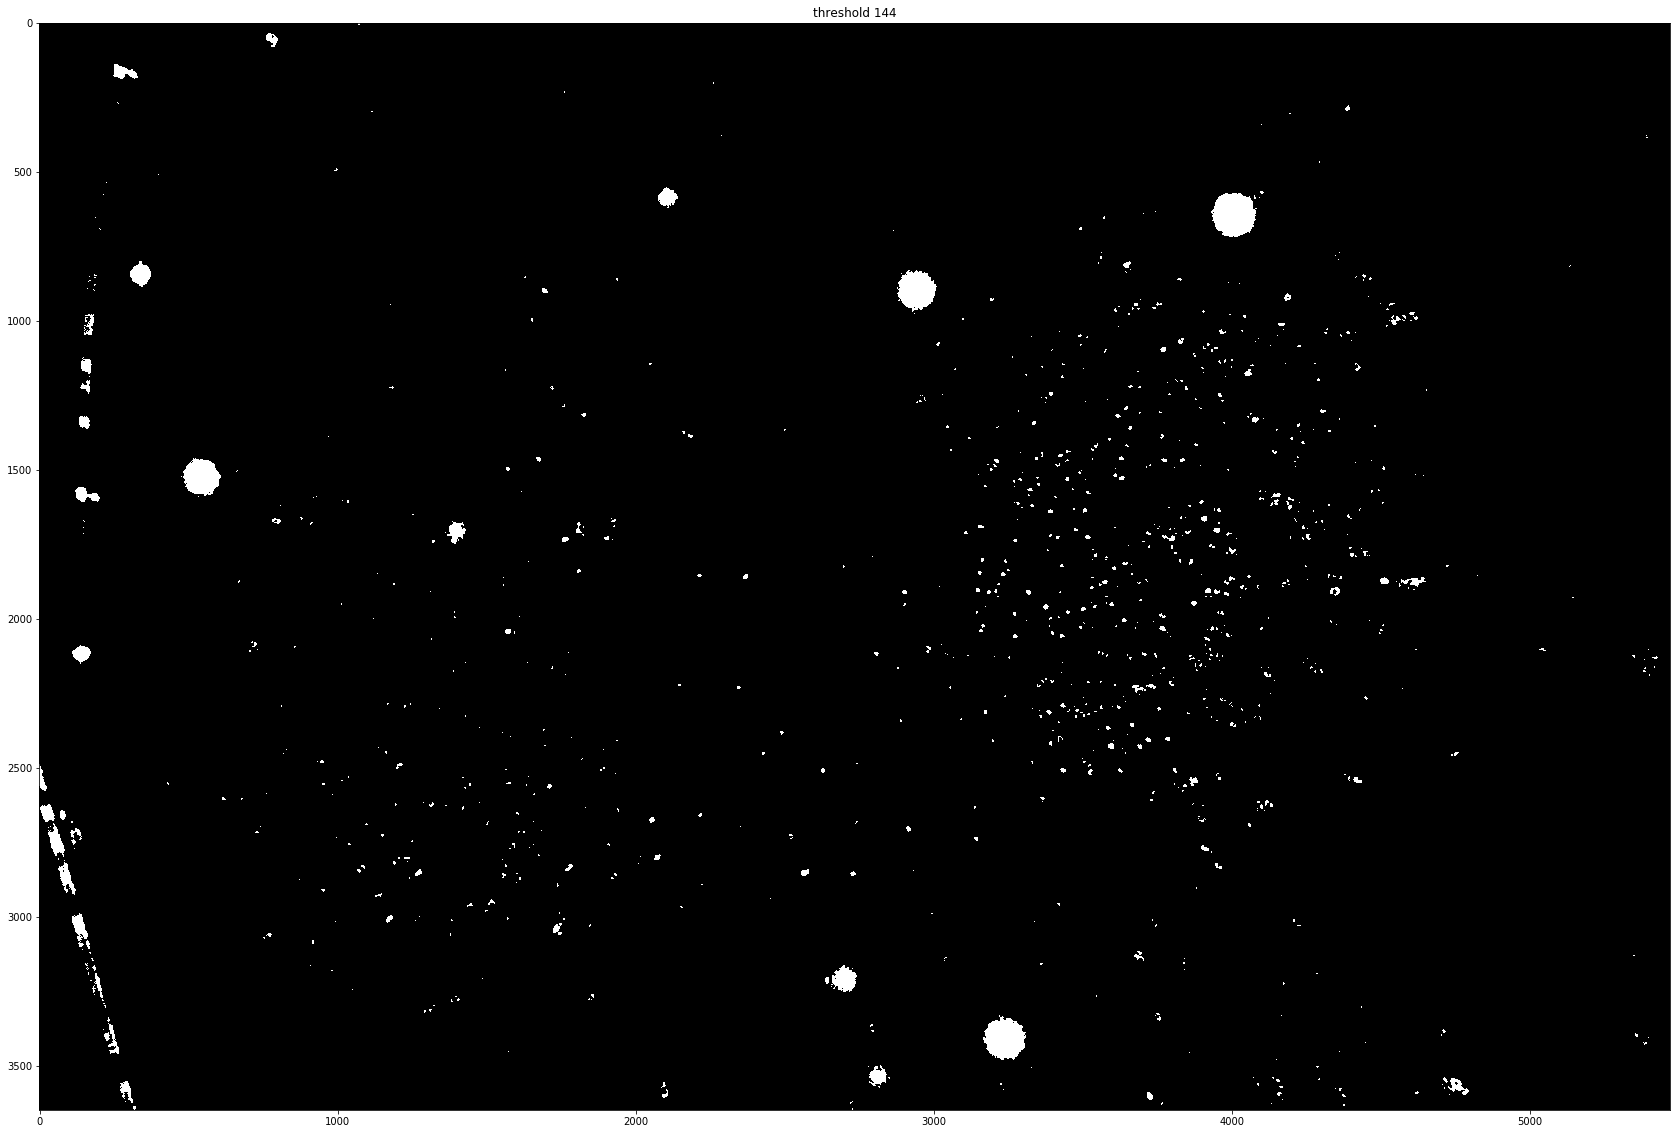

Binarizing images...


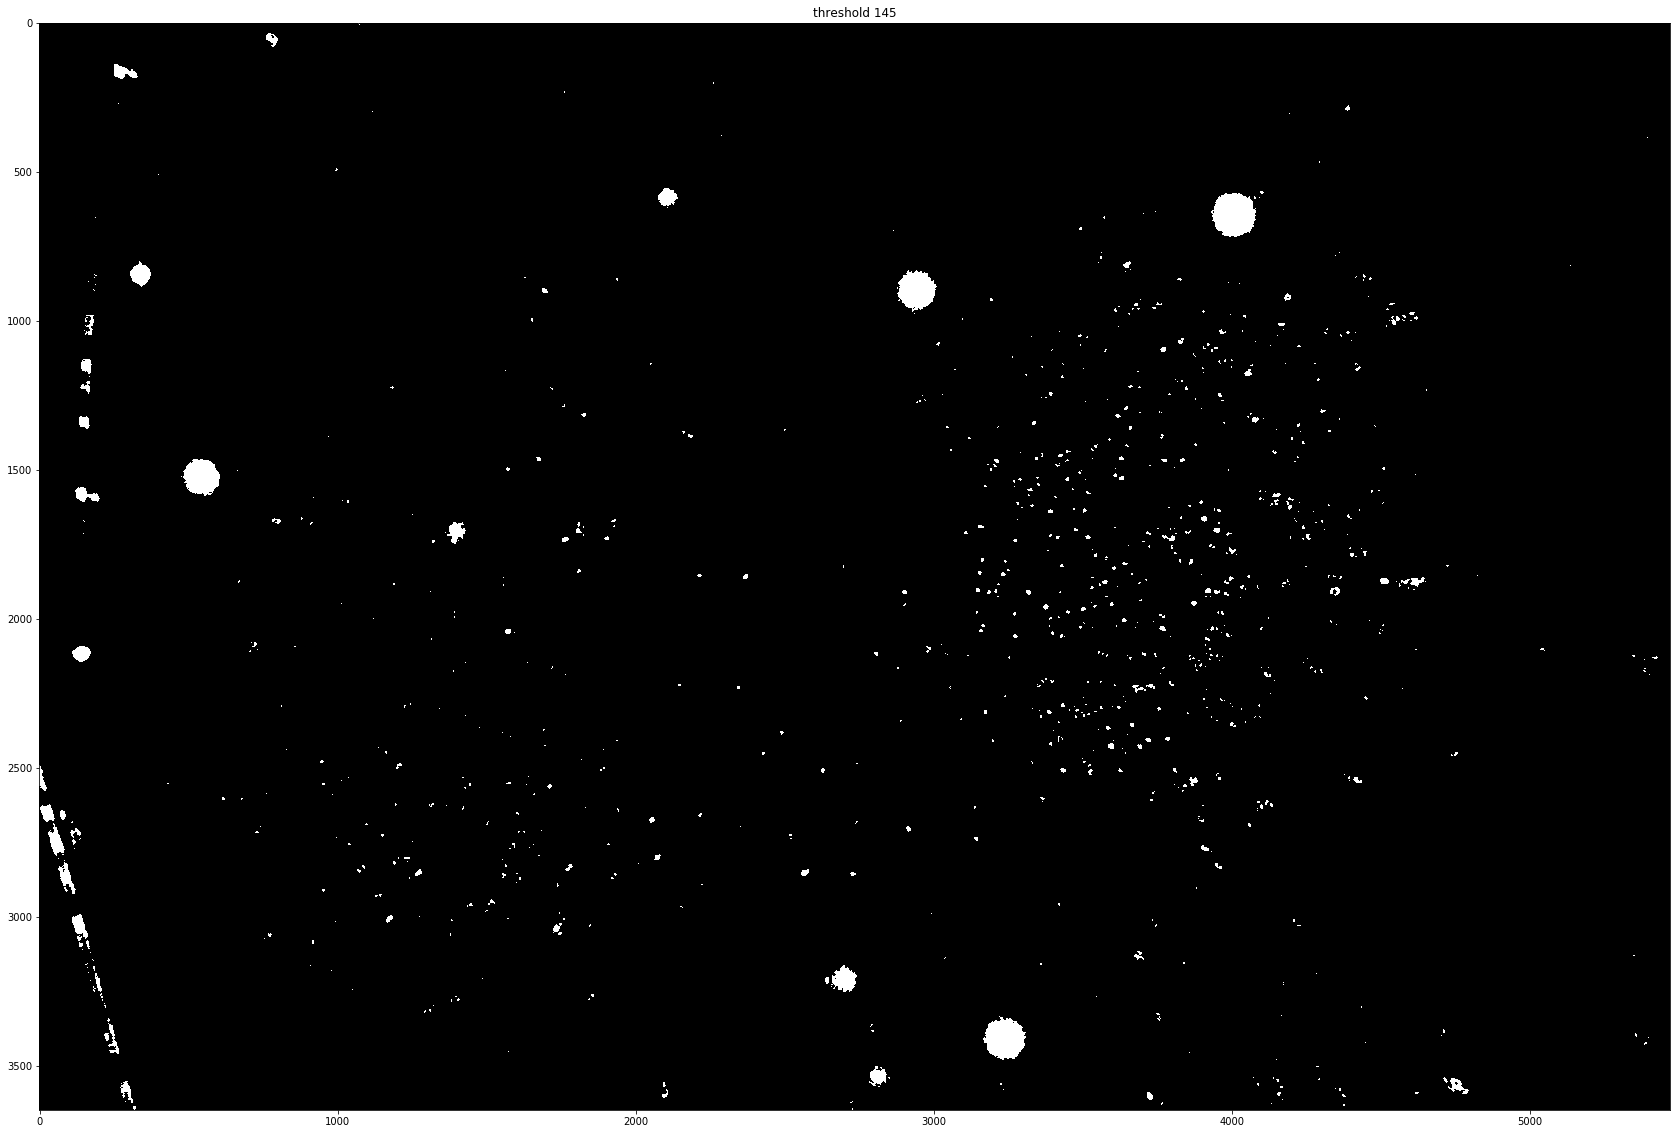

Binarizing images...


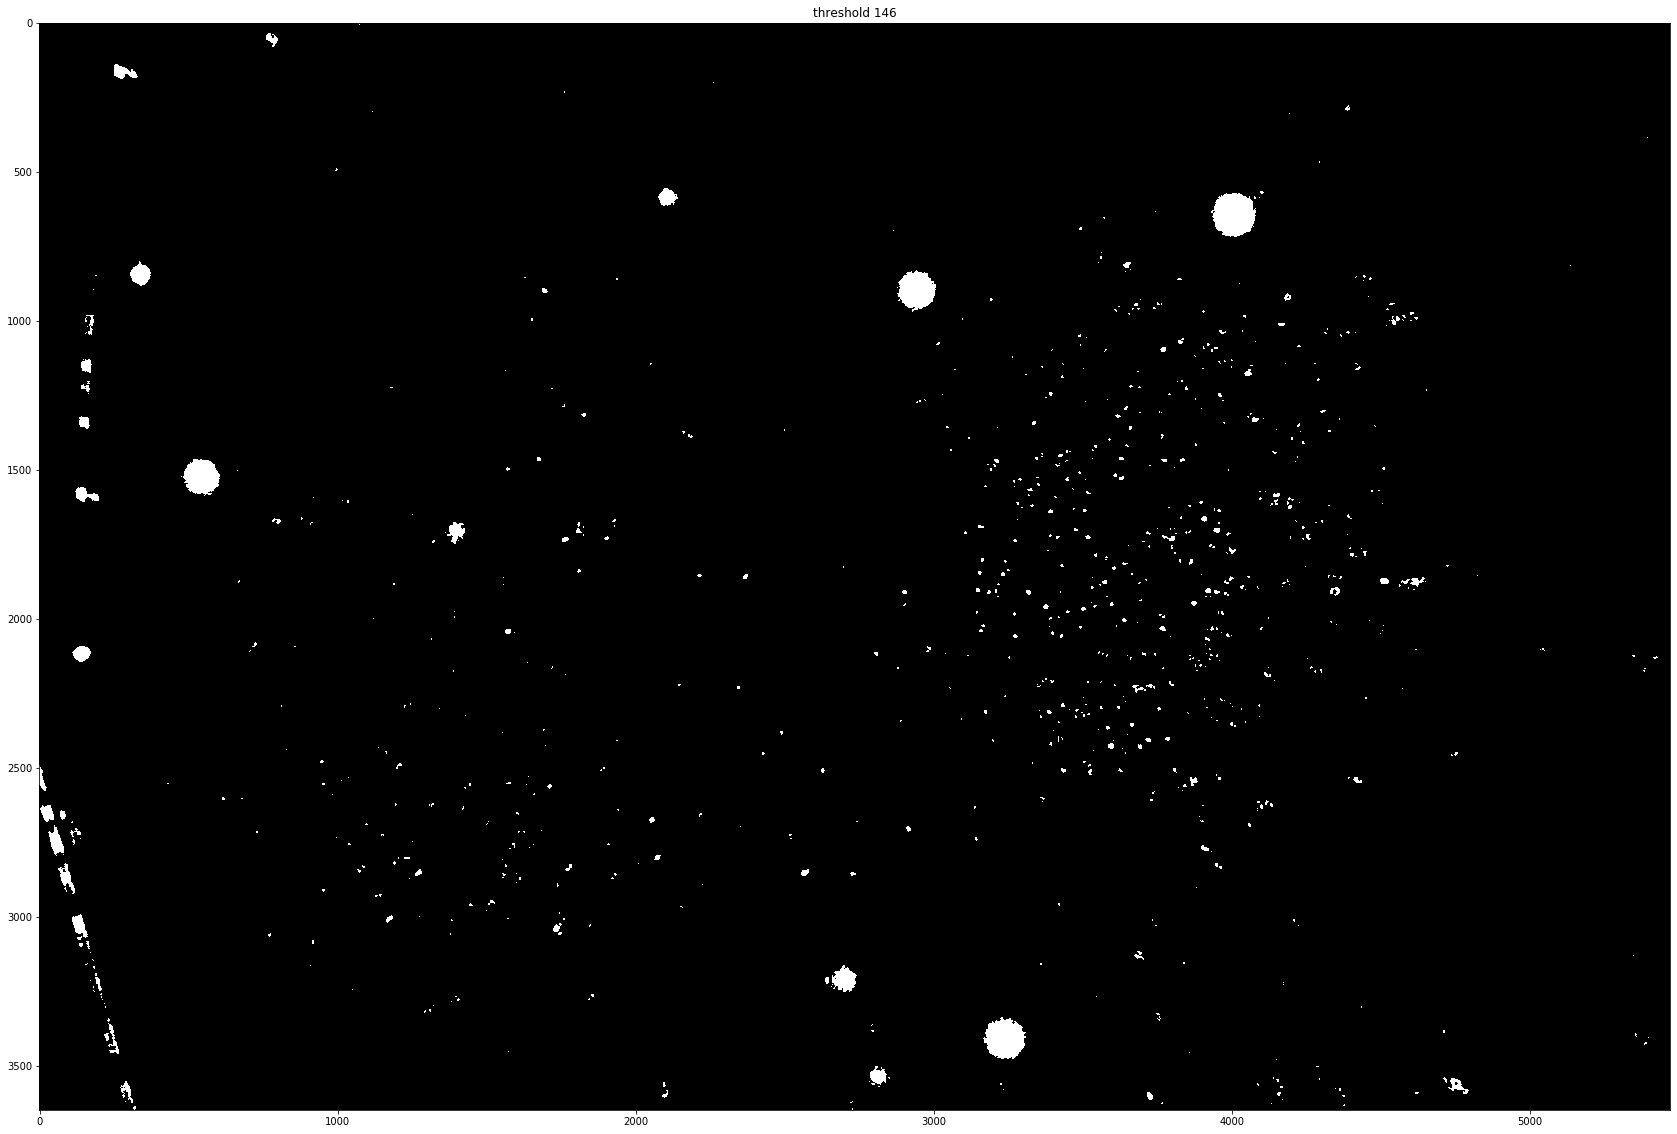

Binarizing images...


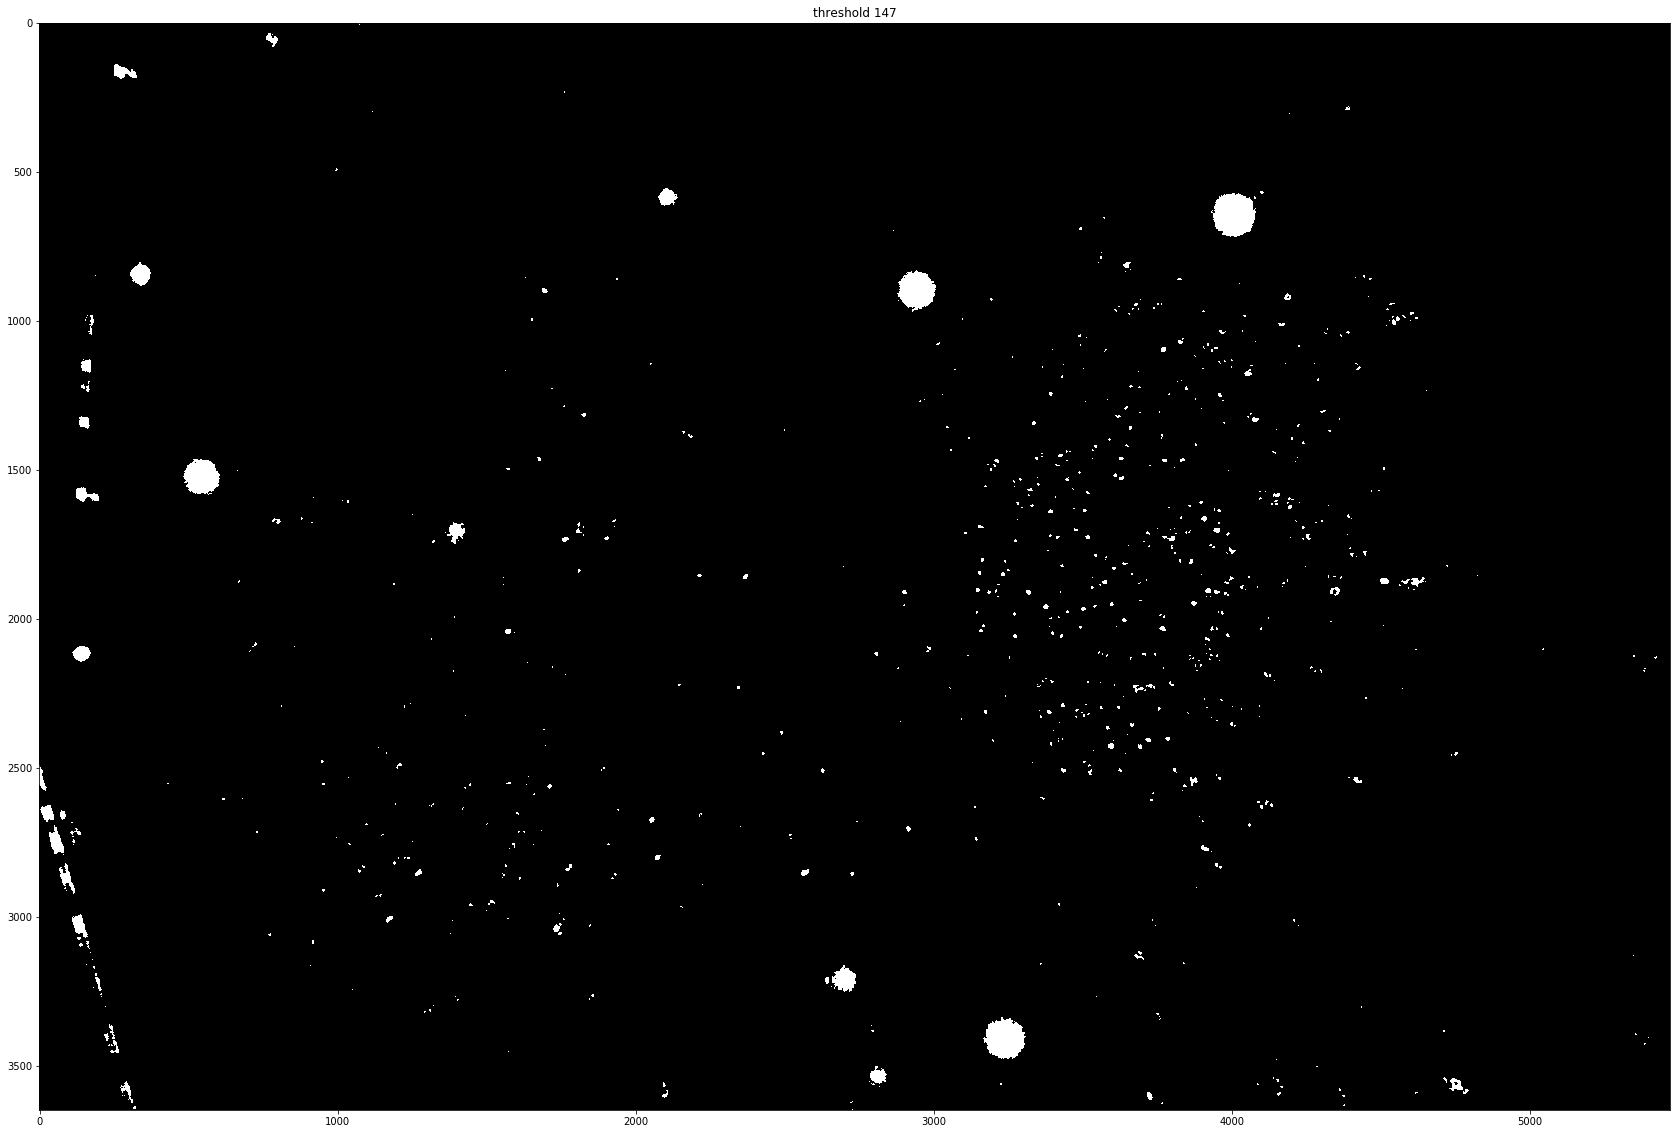

Binarizing images...


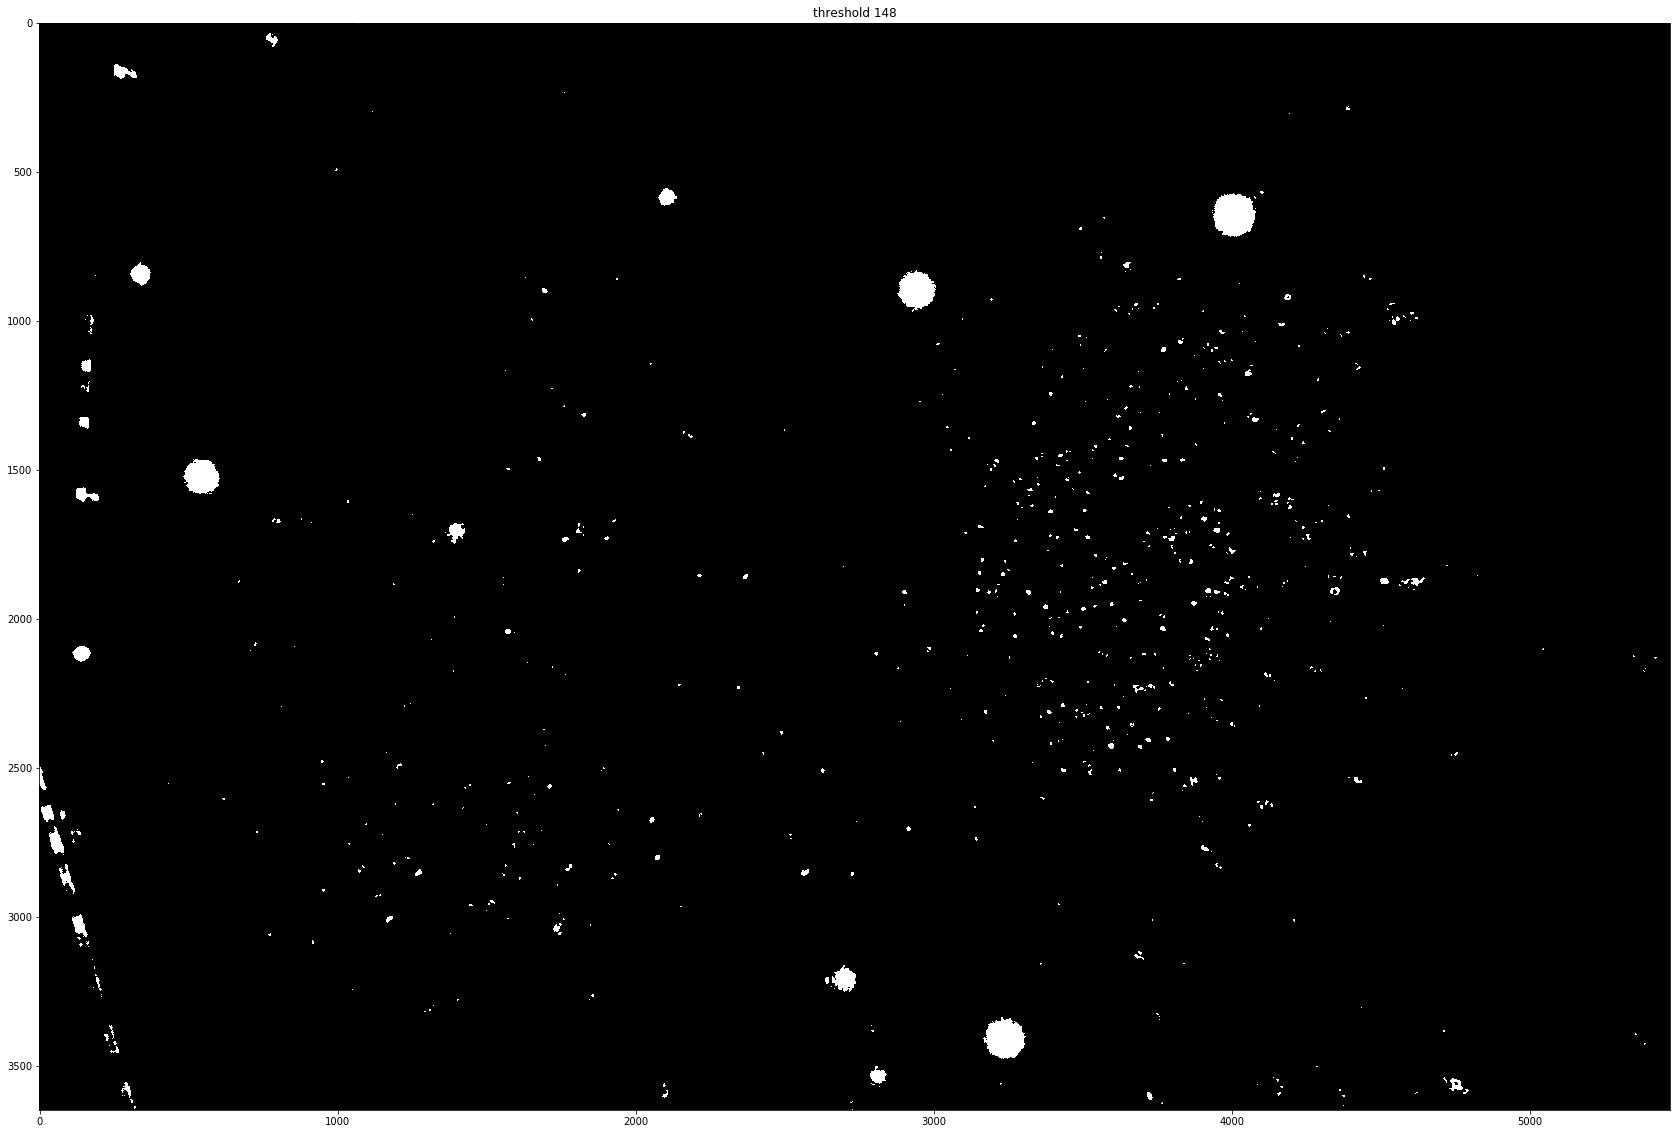

Binarizing images...


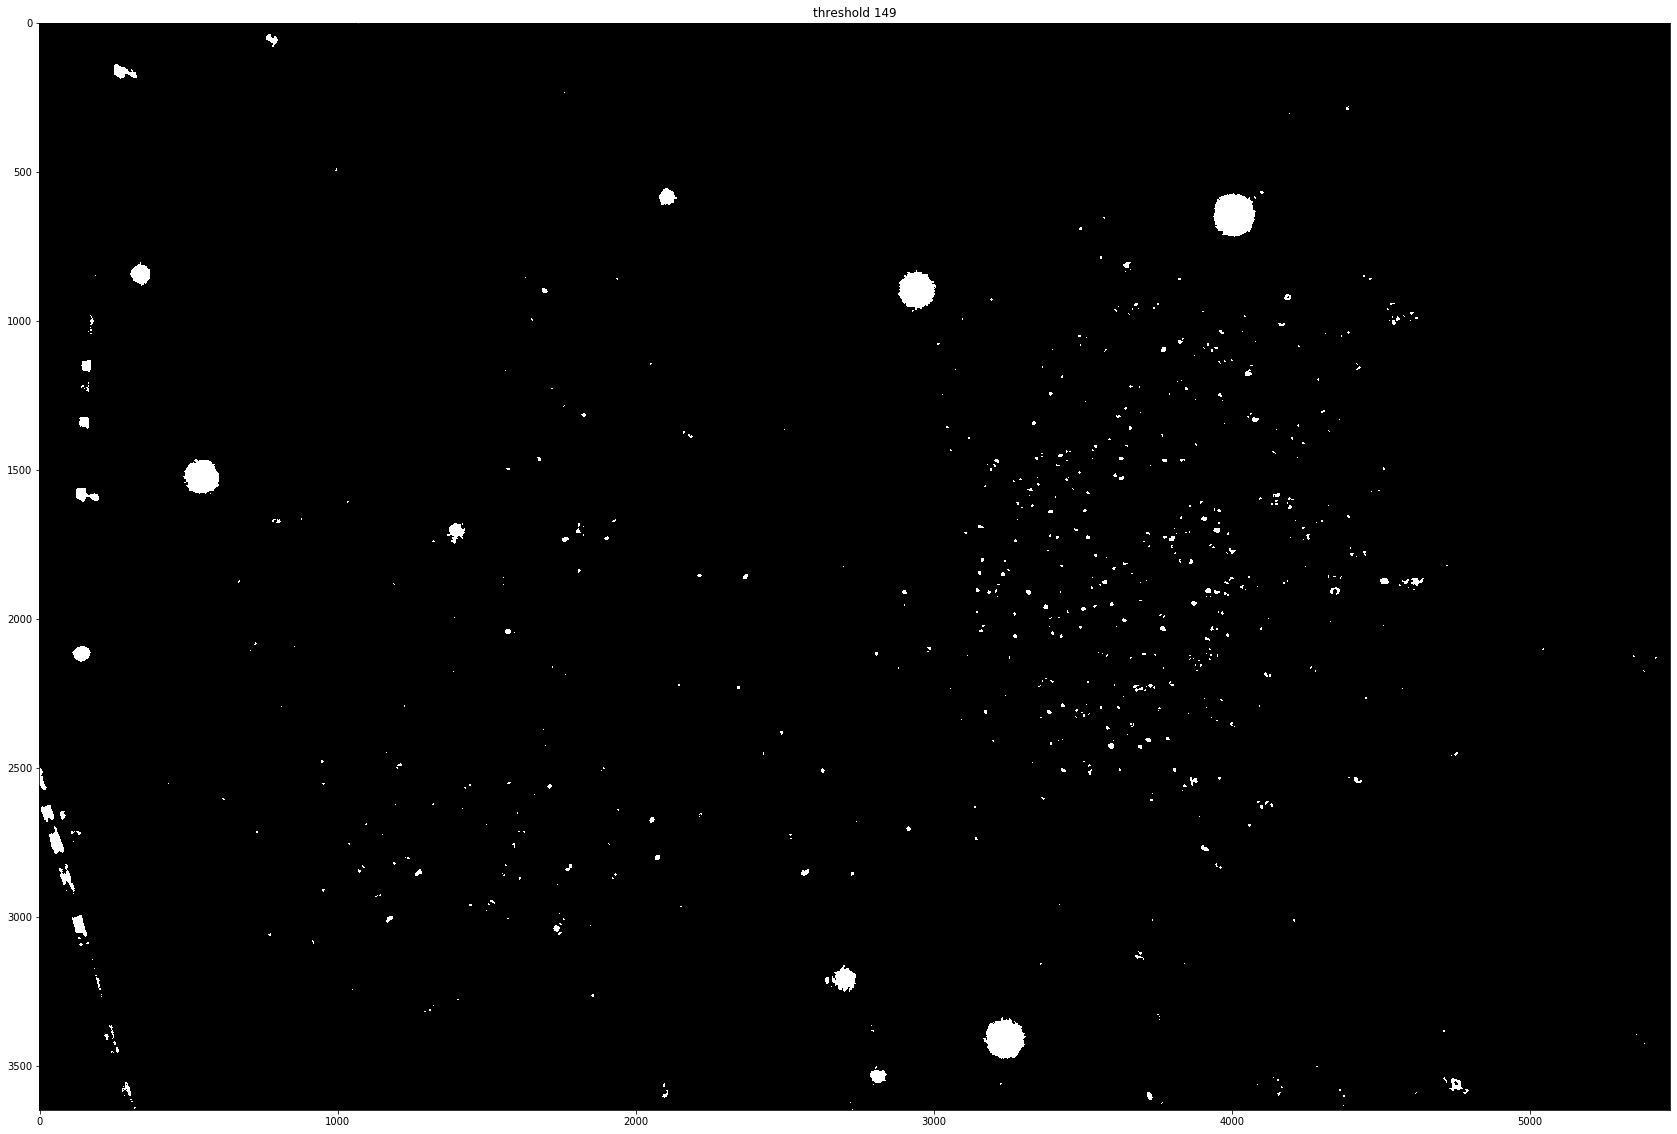

Binarizing images...


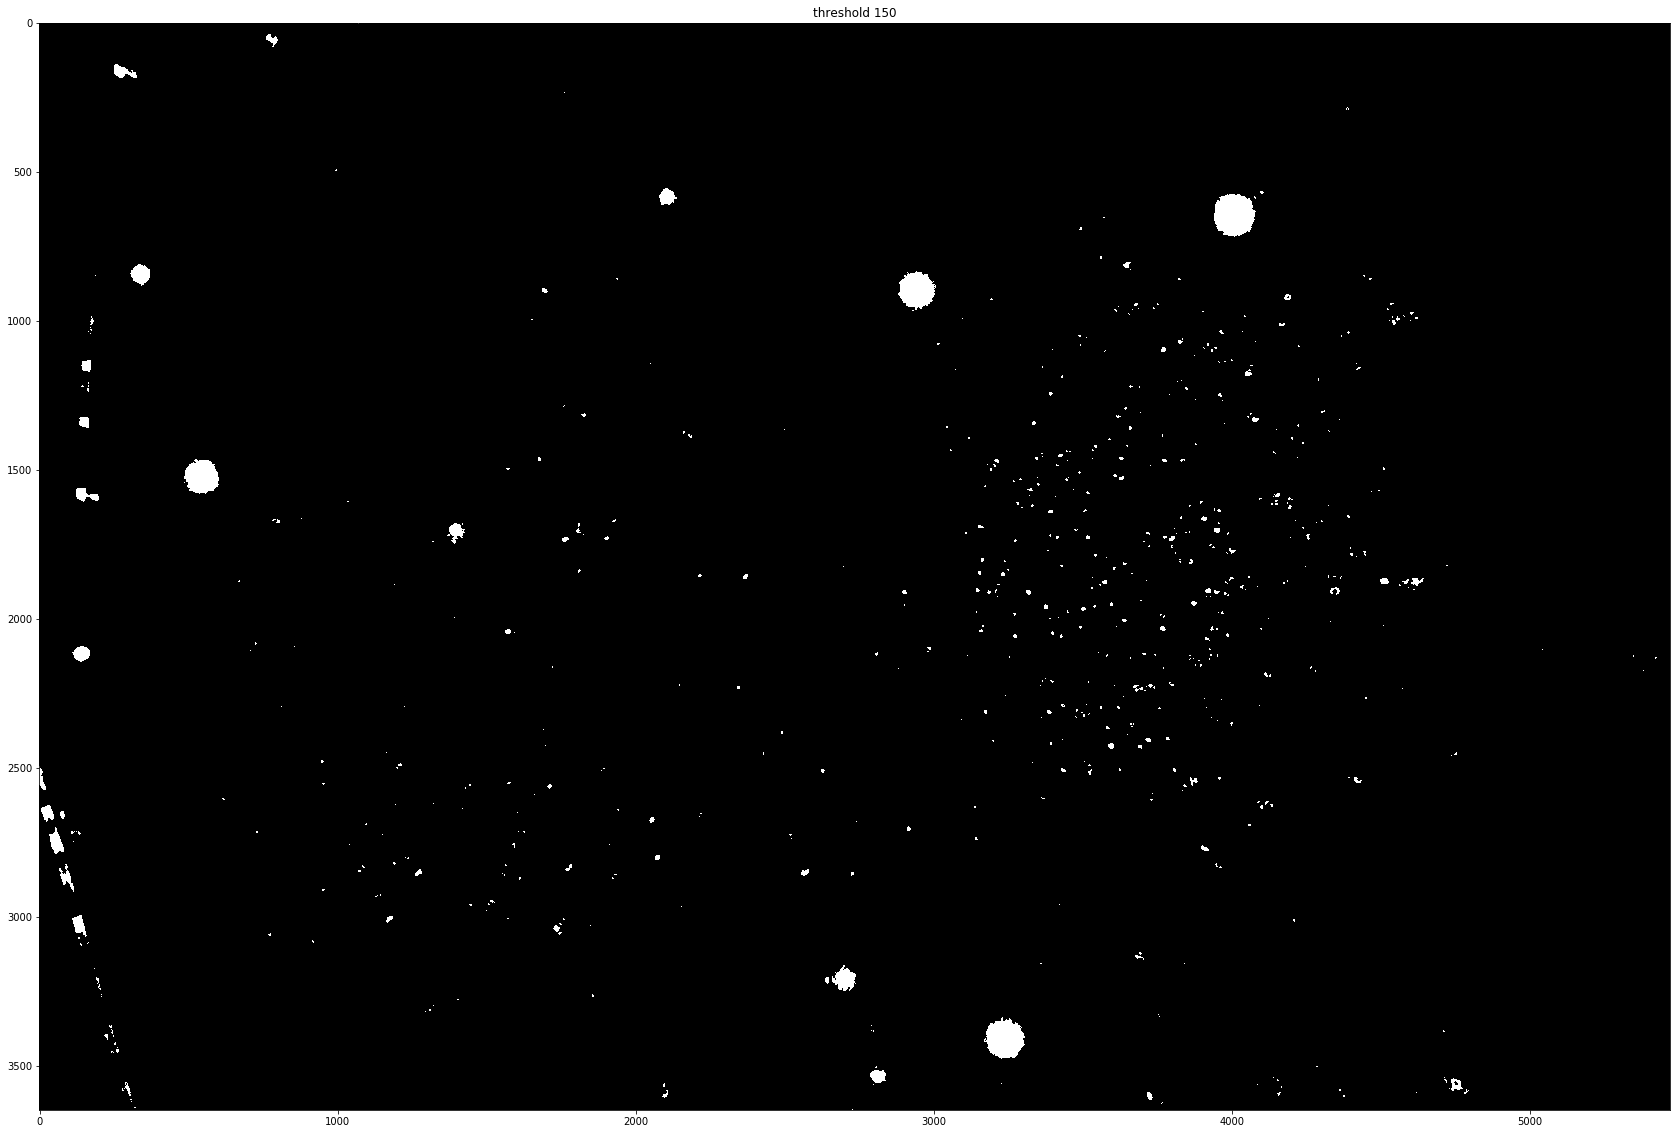

Binarizing images...


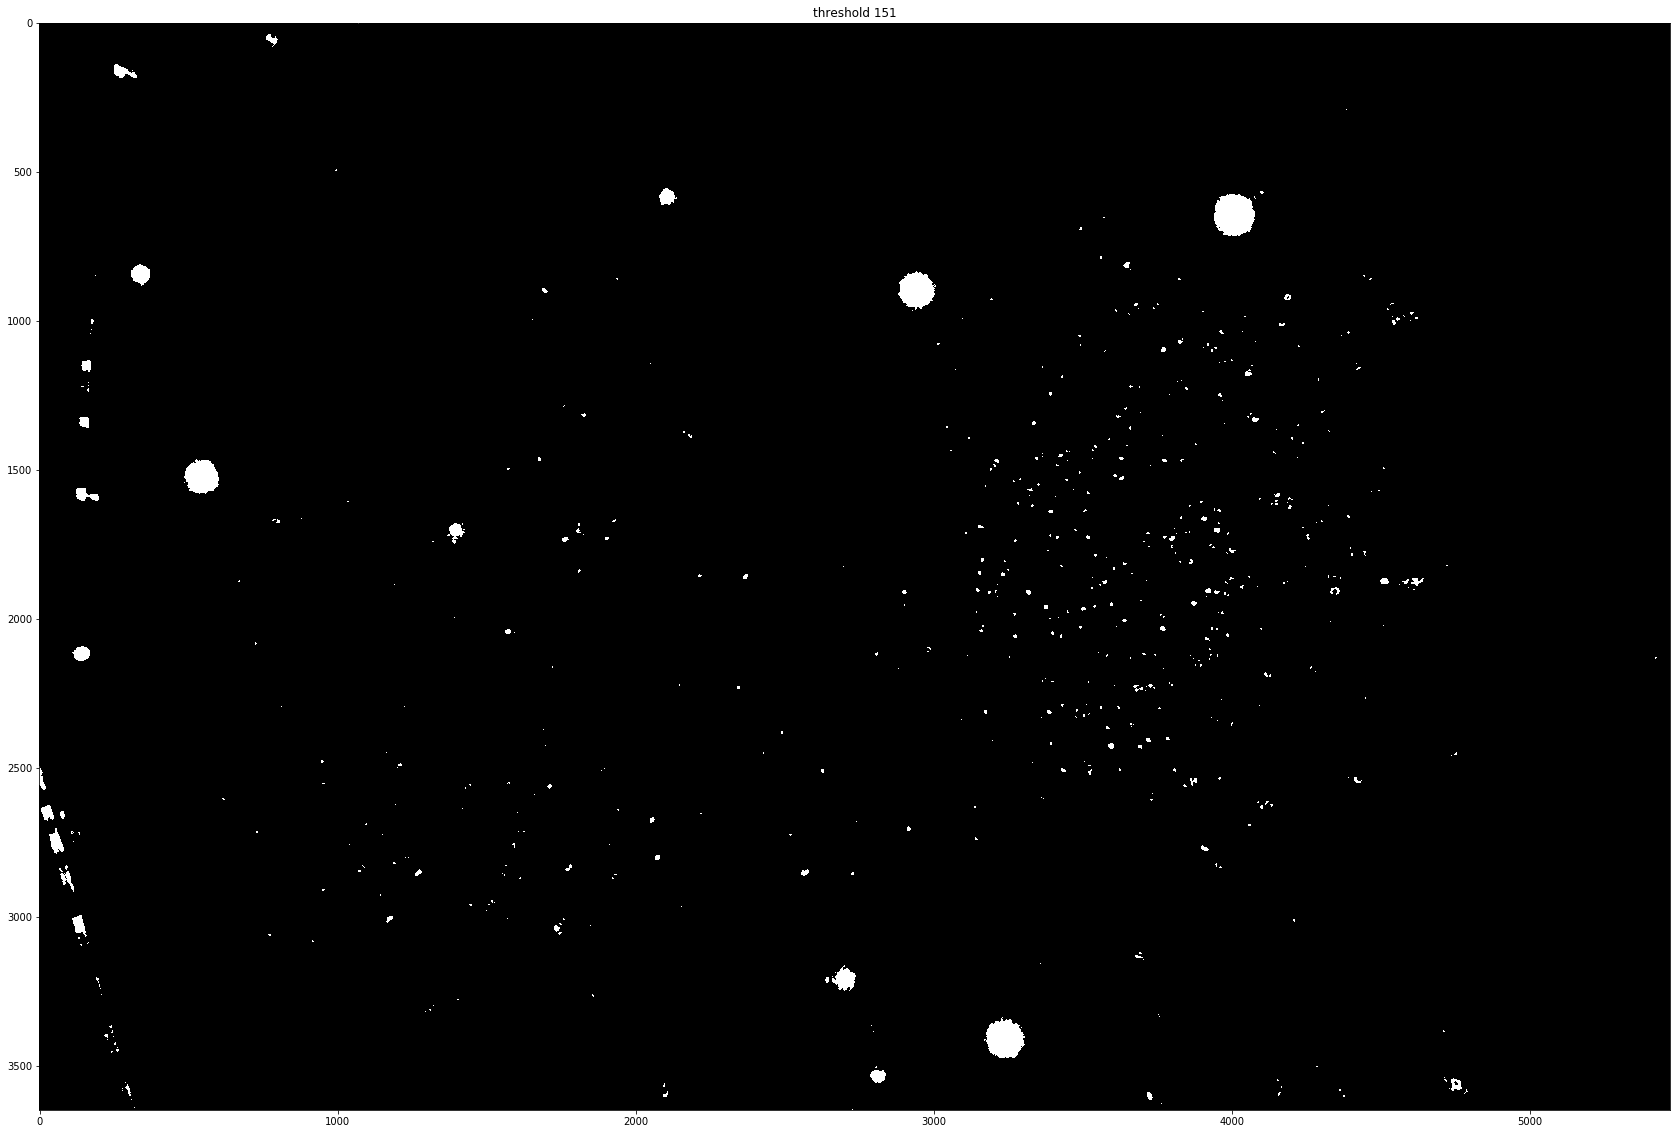

Binarizing images...


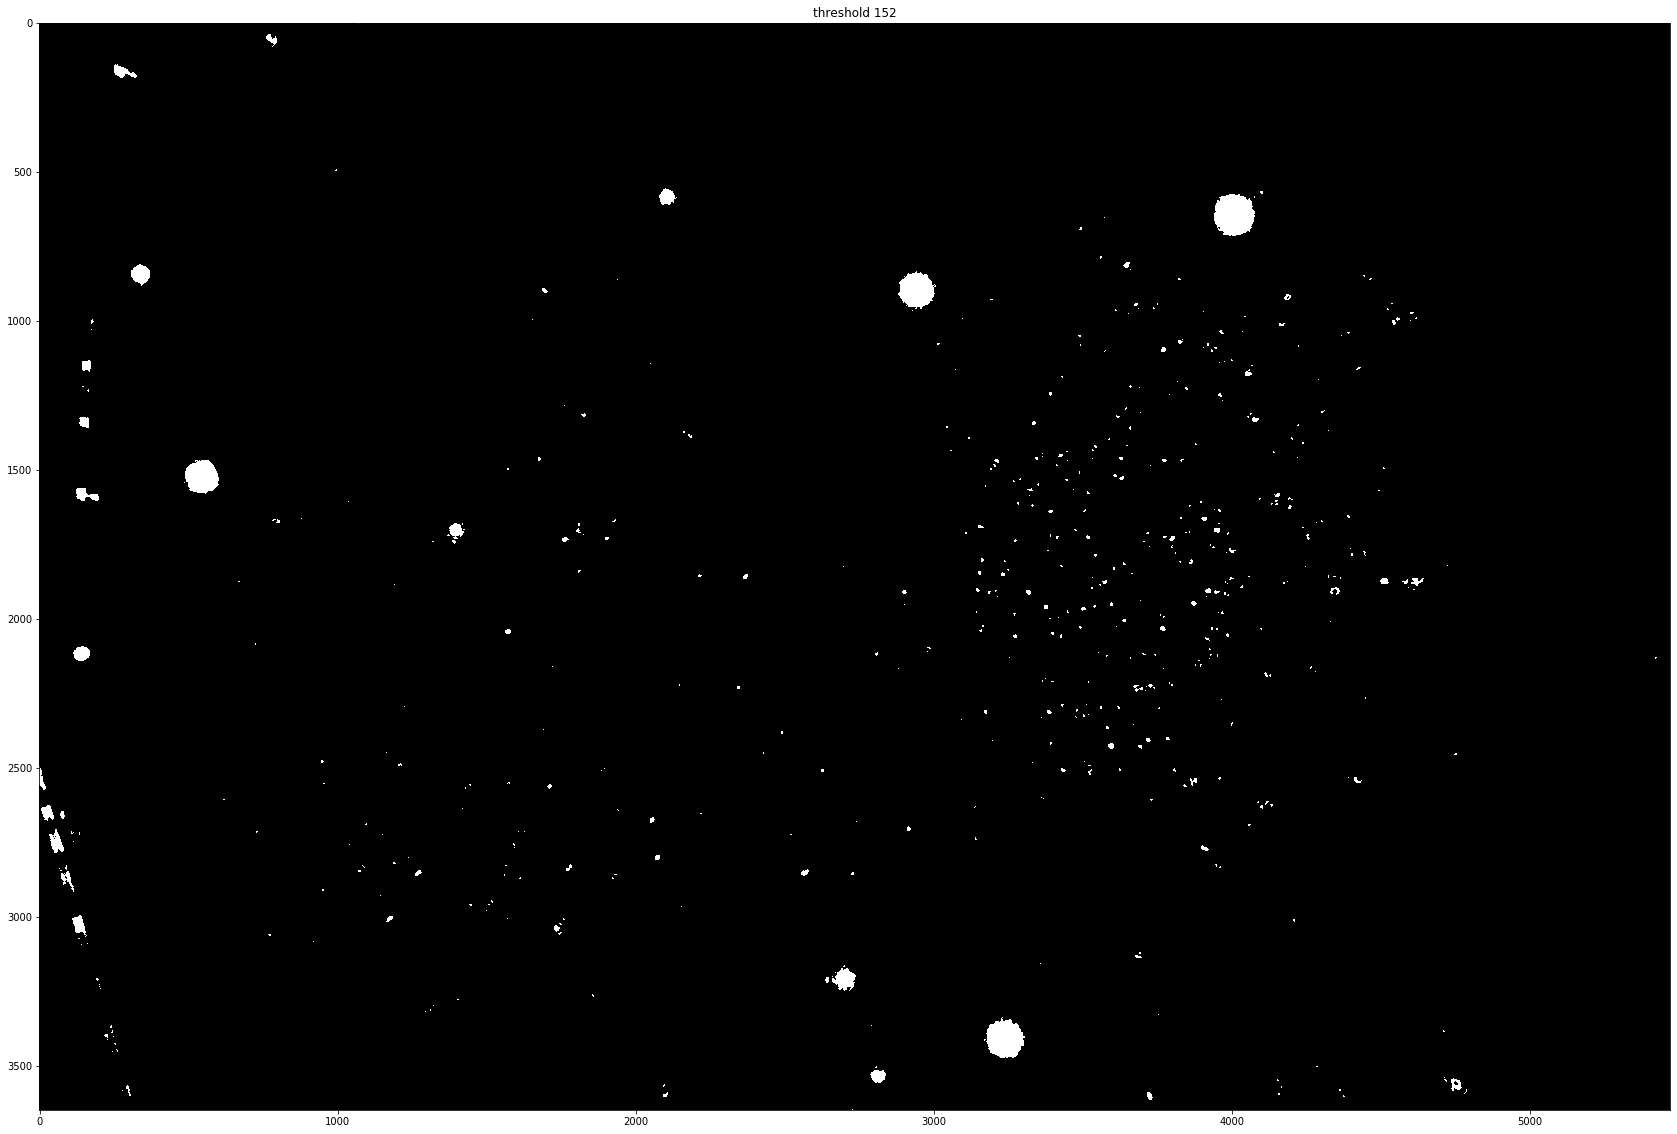

Binarizing images...


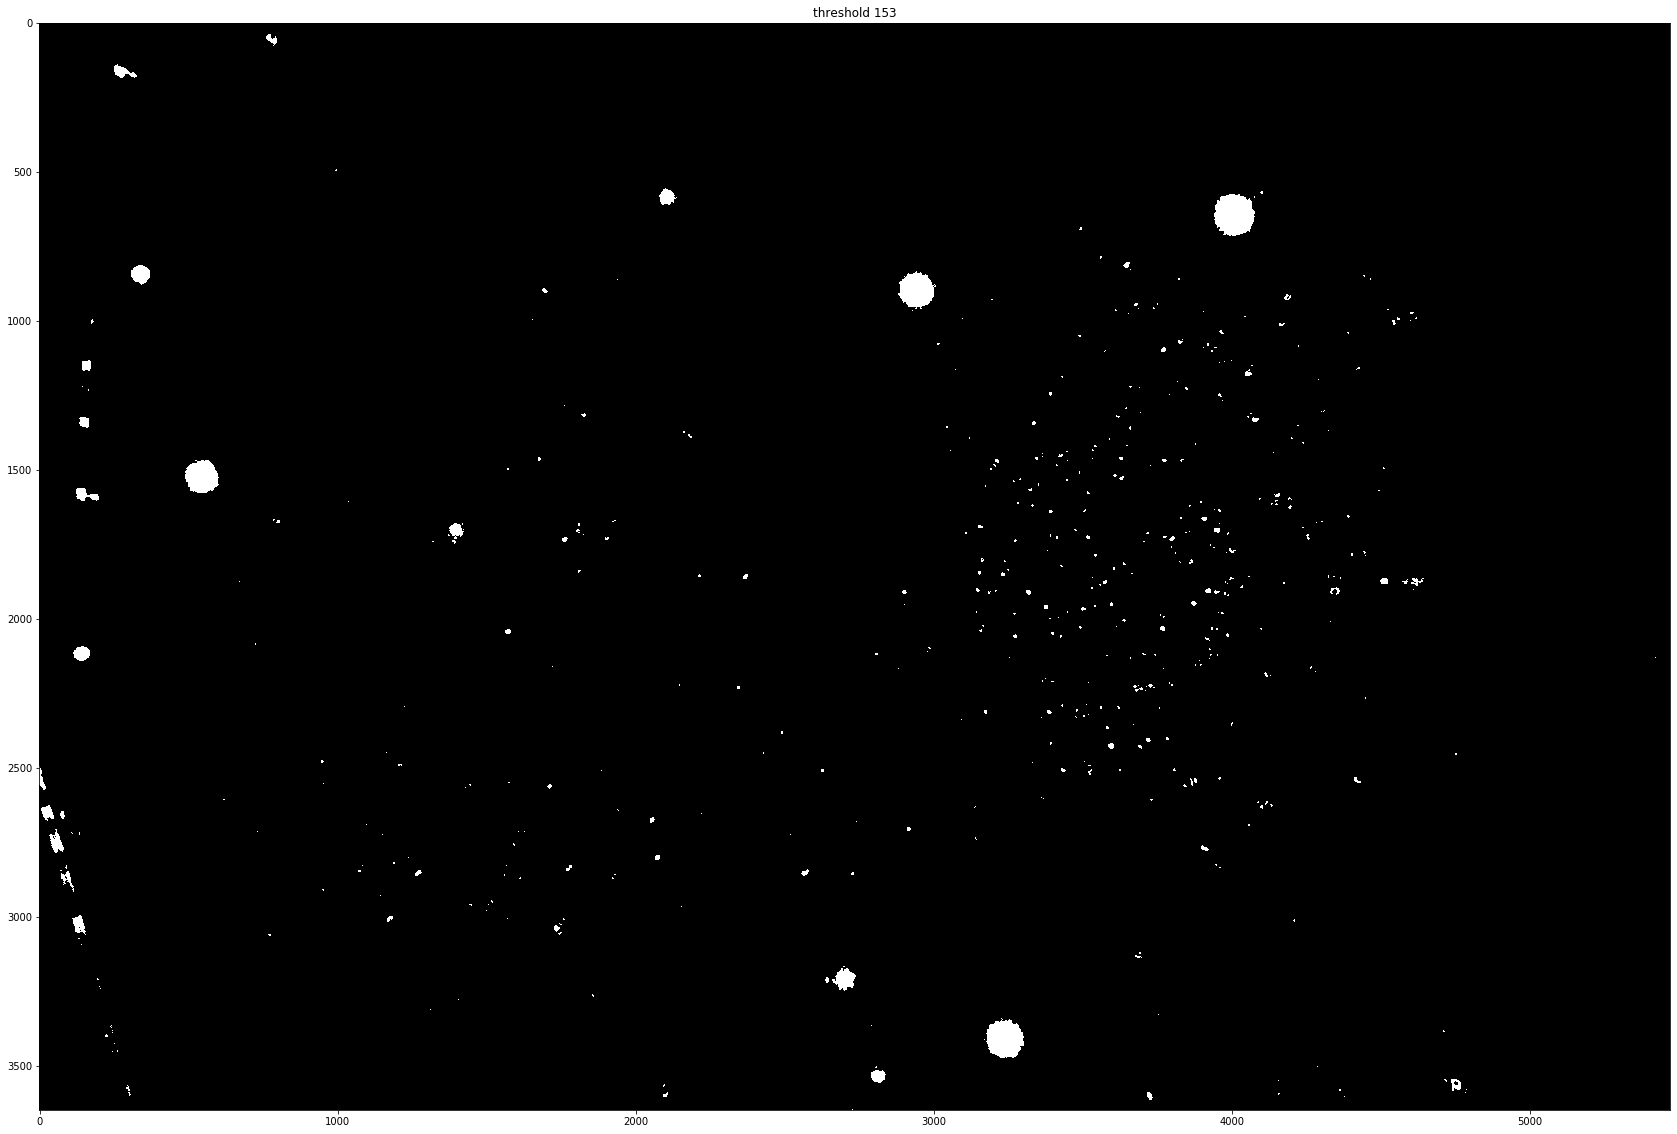

Binarizing images...


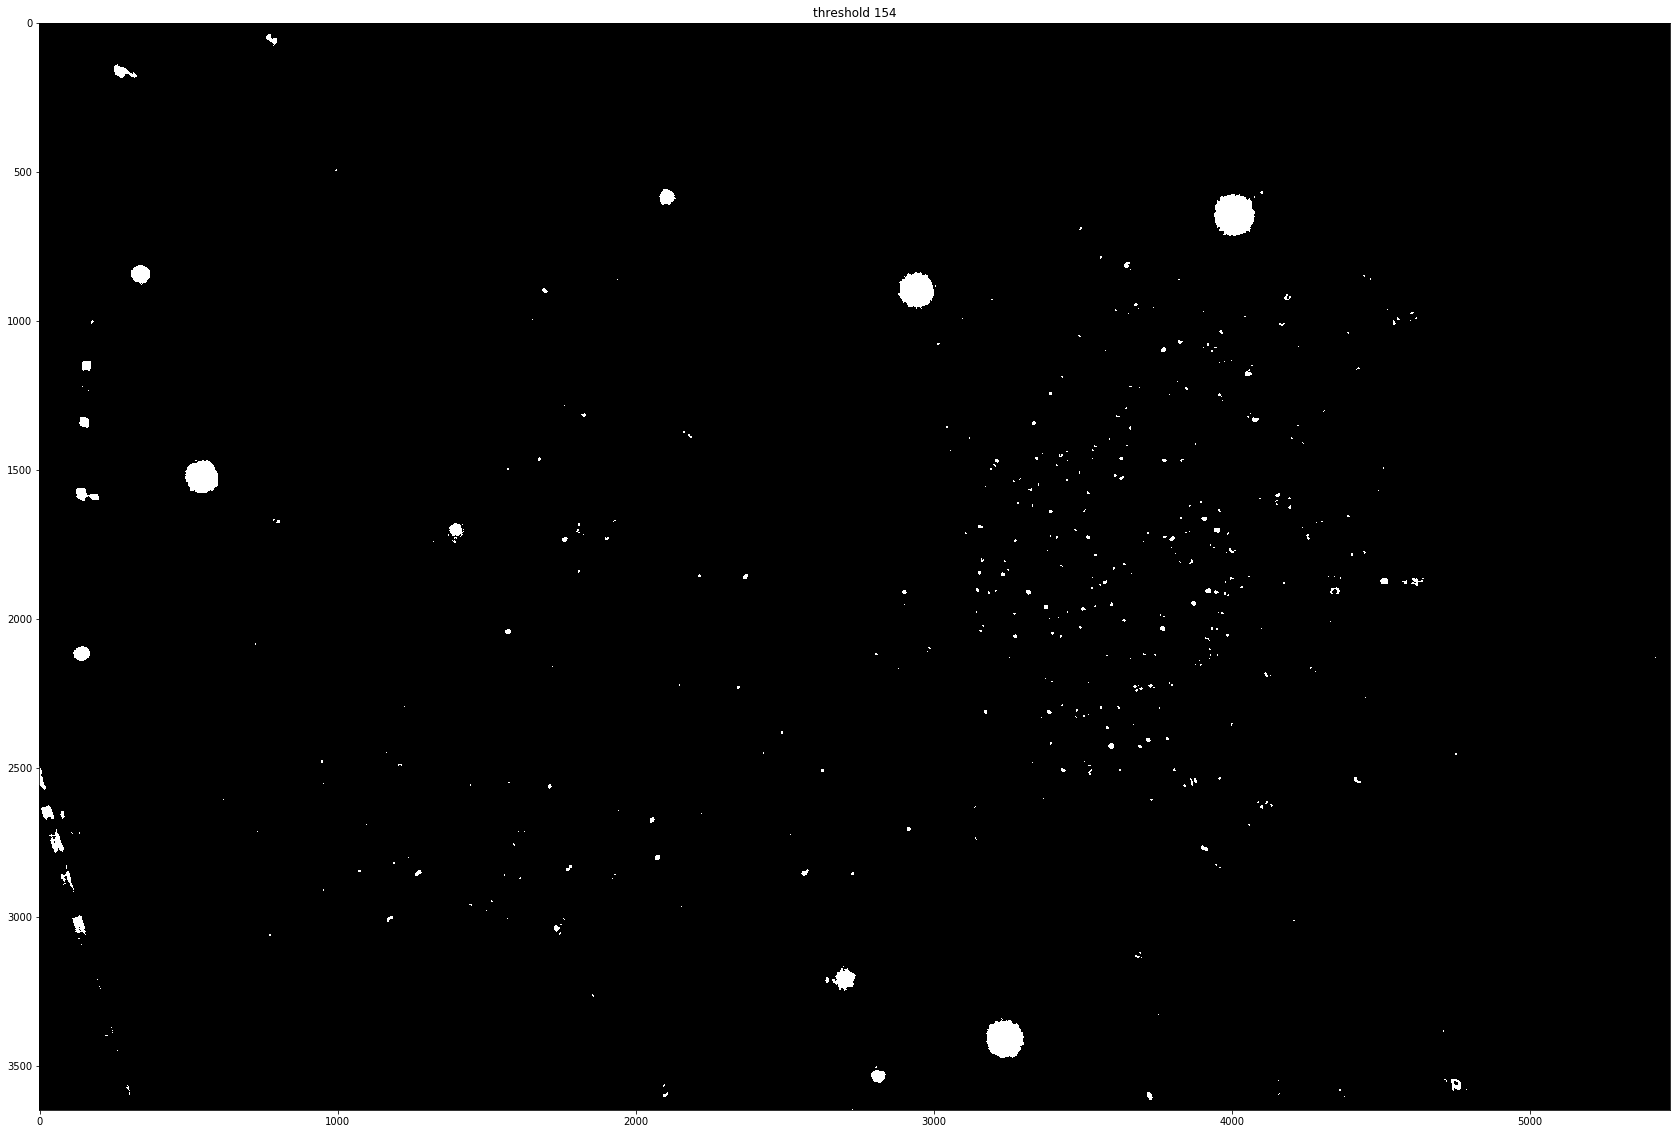

In [9]:
img_test = [imgs_inv[-1]]

plt.figure(figsize=(30,20))
plt.imshow(img_test[0], cmap='gray')
plt.show()

for t in range(130,155):
    rets, img_thresh = binarize_imgs(img_test, tr=t)
    plt.figure(figsize=(30,20))
    plt.imshow(img_thresh[0], cmap='gray')
    plt.title('threshold '+str(t))
    plt.show()

In [ ]:
# 4. Binarizing images: we will have a binary image based on a threshold
axes = []
f1 = plt.figure()
f_signal = []
f_background = []
f_foreground = []
for t in range(120,140):
    #fig=plt.figure(figsize=(18, 16))
    rets, imgs_thresh = binarize_imgs(imgs_inv, tr = t)
    #print('Thresholded images shape: ', np.shape(imgs_thresh))
    print("threshold = " + str(t))
    
    signal = [] #np.zeros(3)
    foreground = []
    background = []
    capture_refresh_time = framerate  # TODO

    mes = Measure(NAME_IMG_FOLDER, ROIs, capture_refresh_time)
    results = []
    for img in imgs_thresh:
        result = mes.signal_perImage(img)
        #results.append(result)
        signal.append(result[0])
        foreground.append(result[1])
        background.append(result[2])
        #print('final signal', signal)
    f_signal.append(signal)
    f_foreground.append(foreground)
    f_background.append(background)


    
#    for s in range(5):
#        b = imgs_thresh[-s]
#        axes.append( fig.add_subplot(1, 5, s+1) )
#        subplot_title=("Subplot_"+str(s))
#        axes[-1].set_title(subplot_title)  
#        plt.imshow(b)
    #fig.tight_layout()    
#    plt.show()

In [ ]:

    #ROI 1 (OLD)
time = np.arange(0, len(signal)*10,10)
plott = f_background
plott2 = f_signal
for line in plott2:
        plt.plot(time, np.array(line))
#plt.plot(time, np.asarray(f_signal[:10]))

plt.legend(["tr1", "tr2", "tr3", "tr4", "tr5"])
plt.show()

## Results

### SELECT ROI 1

In [12]:
## SELECT ROI
ROIs = select_ROI(ROI_PATH) 

Select the ROI. Press right button if you want to delete. The last 2 ROIs will be used as background. Press 'q' when you have finished. 
ROIs:
 [[2248 1284  200]
 [1832 1372  200]
 [1572 1748  200]
 [1792 2108  200]
 [1320 2236  200]
 [1788 2592  200]
 [3456 2792  200]
 [3780 3080  200]]


In [13]:
signal = [] #np.zeros(3)
foreground = []
background = []
capture_refresh_time = framerate  # TODO

mes = Measure(NAME_IMG_FOLDER, ROIs, capture_refresh_time)
results = []
for img in imgs_thresh:
    result = mes.signal_perImage(img)
    results.append(result)
    signal.append(result[0])
    foreground = result[1]
    background = result[2]
    print('final signal', signal)
 
    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Administrator\Desktop\SENSUS\CODE\SensUs_2021_Code-main\analysis\Analyse_results_with_connected_components.py:74: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  xvec, yvec = circle(cx, cy, rad)  #TODO: change to disk


Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.00139321226982143, 0.0, 0.00027068124099387784]
Percentage of pixels corresponding to Background (0-1) 0.00013534062049693892
Percentage of pixels corresponding to Foreground (0-1) 0.00023220204497023832
Percentage of pixels corresponding to Signal (0-1) 9.68614244732994e-05
final signal [9.68614244732994e-05]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0008916558526857152, 0.0, 0.0003343709447571432]
Percentage of pixels corresponding to Background (0-1) 0.0001671854723785716
Percentage of pixels corresponding to Foreground (0-1) 0.00014860930878095253
Percentage of pixels corresponding to Signal (0-1) -1.857616359761906e-05
final signal [9.68614244732994e-05, -1.857616359761906e-05]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 

Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0010668025380346949, 0.0, 8.757334267448988e-05]
Percentage of pixels corresponding to Background (0-1) 4.378667133724494e-05
Percentage of pixels corresponding to Foreground (0-1) 0.00017780042300578249
Percentage of pixels corresponding to Signal (0-1) 0.00013401375166853755
final signal [9.68614244732994e-05, -1.857616359761906e-05, 2.653737656802723e-05, 0.00012207193221292528, 0.00012074506338452393, 0.00015524365292295933, 6.2362834934864e-05, 6.236283493486397e-05, 7.961212970408174e-05, 3.980606485204071e-06, 2.1229901254421783e-05, 2.255677008282313e-05, 5.440162196445583e-05, 0.00013401375166853755]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.000979229195360205, 0.0, 0.0003423321577275514]
Percentage of pixels corresponding to Background (0-1) 0.000171

Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0006448582506030618, 0.0, 0.0]
Percentage of pixels corresponding to Background (0-1) 0.0
Percentage of pixels corresponding to Foreground (0-1) 0.0001074763751005103
Percentage of pixels corresponding to Signal (0-1) 0.0001074763751005103
final signal [9.68614244732994e-05, -1.857616359761906e-05, 2.653737656802723e-05, 0.00012207193221292528, 0.00012074506338452393, 0.00015524365292295933, 6.2362834934864e-05, 6.236283493486397e-05, 7.961212970408174e-05, 3.980606485204071e-06, 2.1229901254421783e-05, 2.255677008282313e-05, 5.440162196445583e-05, 0.00013401375166853755, -7.961212970408169e-06, -5.0421015479251734e-05, -3.980606485204071e-06, -3.44985895384354e-05, -1.7249294769217712e-05, -5.7055359621258555e-05, -8.226586736088444e-05, 6.767031024846946e-05, 0.0, 0.0001074763751005103]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Perc

Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0008279661489224499, 0.0, 0.0]
Percentage of pixels corresponding to Background (0-1) 0.0
Percentage of pixels corresponding to Foreground (0-1) 0.00013799435815374164
Percentage of pixels corresponding to Signal (0-1) 0.00013799435815374164
final signal [9.68614244732994e-05, -1.857616359761906e-05, 2.653737656802723e-05, 0.00012207193221292528, 0.00012074506338452393, 0.00015524365292295933, 6.2362834934864e-05, 6.236283493486397e-05, 7.961212970408174e-05, 3.980606485204071e-06, 2.1229901254421783e-05, 2.255677008282313e-05, 5.440162196445583e-05, 0.00013401375166853755, -7.961212970408169e-06, -5.0421015479251734e-05, -3.980606485204071e-06, -3.44985895384354e-05, -1.7249294769217712e-05, -5.7055359621258555e-05, -8.226586736088444e-05, 6.767031024846946e-05, 0.0, 0.0001074763751005103, 0.00014064809581054437, 5.042101547925175e-05, 5.174788430765312e-05, 4.51135401656463e-05, 4.2459802508843566e-05, 6.3689

Percentage of pixels detected in each ROI (0-1) [0.0, 0.0, 0.0, 0.0, 0.0, 0.001019035260212246, 0.0, 0.00031844851881632685]
Percentage of pixels corresponding to Background (0-1) 0.00015922425940816343
Percentage of pixels corresponding to Foreground (0-1) 0.00016983921003537434
Percentage of pixels corresponding to Signal (0-1) 1.0614950627210919e-05
final signal [9.68614244732994e-05, -1.857616359761906e-05, 2.653737656802723e-05, 0.00012207193221292528, 0.00012074506338452393, 0.00015524365292295933, 6.2362834934864e-05, 6.236283493486397e-05, 7.961212970408174e-05, 3.980606485204071e-06, 2.1229901254421783e-05, 2.255677008282313e-05, 5.440162196445583e-05, 0.00013401375166853755, -7.961212970408169e-06, -5.0421015479251734e-05, -3.980606485204071e-06, -3.44985895384354e-05, -1.7249294769217712e-05, -5.7055359621258555e-05, -8.226586736088444e-05, 6.767031024846946e-05, 0.0, 0.0001074763751005103, 0.00014064809581054437, 5.042101547925175e-05, 5.174788430765312e-05, 4.5113540165646

In [ ]:
import pandas as pd
R = pd.DataFrame(results, columns=["Signal", "Foreground", "Background"])
print(R)
title = "50pg"
ROI = "_ROI_1"
R.to_csv('Results_'+ title + ROI + '.csv', sep=';')

In [ ]:
#ROI 1 (OLD)
plt.figure()
time = np.arange(0, len(signal)*10,10)
plt.plot(time, results)
plt.legend(["signal", "foreground", "background"])
plt.title(title+" ROI1")
plt.show()

### SELECT ROI 2

In [ ]:
## SELECT ROI
ROIs = select_ROI(ROI_PATH) 

In [ ]:
signal = [] #np.zeros(3)
foreground = []
background = []
capture_refresh_time = framerate  # TODO

mes = Measure(NAME_IMG_FOLDER, ROIs, capture_refresh_time)
results = []
for img in imgs_thresh:
    print(img)
    result = mes.signal_perImage(img)
    results.append(result)
    signal.append(result[0])
    foreground = result[1]
    background = result[2]
    print('final signal', signal)
 
    

In [ ]:
import pandas as pd
R = pd.DataFrame(results, columns=["Signal", "Foreground", "Background"])
print(R)
ROI2 = "_ROI_2"
R.to_csv('Results_'+ title + ROI2 + '.csv', sep=';')

In [ ]:
#ROI 2
plt.figure()
time = np.arange(0, len(signal)*10,10)
plt.plot(time, results)
plt.legend(["signal", "foreground", "background"])
plt.title(title+" ROI 2")
plt.show()